# Exploratory Data Analysis and Predictive model on breast cancer data
#### Javier García Carrasco | Python in Engineering Calculations

Breast cancer is one of the most prevalent diseases among women, especially those aged 40 to 59, with risk factors including genetic predisposition, environmental influences, and behavioral habits. It is characterized by the uncontrolled growth of cells within breast tissue. Globally, breast cancer ranks second only to lung cancer in incidence, affecting one in eight women during their lifetime. While it can also occur in men, women are 100 times more likely to develop the disease. Early identification of whether a breast mass is benign or malignant is crucial, to this end, specific tumor features can offer valuable preliminary insights into its nature.

[_Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC8993572/_]

-----------

This project aims to work with a dataset containing breast cancer data. The two main objectives of the project are: (1) to analyze the data and identify which features or combination of them determine whether a breast cancer tumor is benign or malignant, and (2) to experiment with various predictive models in order to accurately predict if a tumor is likely to be malignant based on its characteristics.

The selected dataset is available on [_Kaggle_](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data) and [_UCI Machine Learning Repository_](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). It originates from research by William Wolberg and colleagues at the University of Wisconsin. The dataset contains information derived from fine needle aspirates (FNA) of breast masses and includes features describing tumor characteristics (texture, radius, smoothness, etc.).

Although the initial project idea was to carry out the EDA and predictive model on [heart attack data](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset), the fact that it consists of synthetic data limits the presence of detectable patterns that would tipically enhance high model accuracy and reliability. For this reason, it was decided to search for another dataset that remains related to the original dataset idea. A new one was chosen so that it also addresses the healthcare domain while ensuring it originates from reliable and real-world sources.

## 0. Imports

In [ ]:
import sys
sys.path.append("./src")
import funs # local import
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

## 1. Dataset acquisition [optional]

This step is optional, as the dataset (`data.csv`) is already located in the "data" folder. However, if it is wished to download it again from _Kaggle_ to ensure the data is consistent with the latest updates (in case any have been made), this cell is available. It is important to note that in order to update the dataset this way, a _Kaggle_ account, along with the `kaggle.json` file generated from the account (see `README.md`) are needed. The content of this file should be substituted by the one already in `config/kaggle.json`.

In [342]:
funs.config_kaggle()
funs.download_dataset()

Kaggle configuration done!
Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
Dataset downloaded successfully!


## 2. Exploratory Data Analysis (EDA)

In this section, an Exploratory Data Analysis will be performed to understand the structure and characteristics of the dataset. EDA is essential for identifying patterns, anomalies, and relationships between features. It also helps in selecting the most appropriate features - those that, either individually or in combination, contribute to the prediction of the target variable and influence its classification in one way or another.

### 2.1. Understanding the dataset structure

Since the dataset is in CSV format, we will use `read_csv` function to load it into a _Pandas_ DataFrame. After loading the data, a copy of the DataFrame (`df`) is created to avoid modifying the original dataset (`df_orig`) during the analysis process.

In [122]:
df_orig = pd.read_csv("./data/data.csv")
df = df_orig.copy()

We can preview the first 5 rows of the DataFrame by using `head()` method.

In [53]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

The DataFrame method reveals it contains 33 columns, but not all are displayed due to space constraints, represented by `...`. Some of the visible columns include `id`, `diagnosis`, `radius_mean`, `texture_mean`, and others. The number of rows of `df`, however, does not match the result shown in the previous cell, as the head method only displays the first five rows by default. To determine the total number of rows, we can use the `info_df` function created in the `funs.py` file.

In [58]:
funs.info_df(df)

DataFrame Information:
- Rows: 569
- Columns: 33


Now, we know that the dataset contains **569 rows**, representing the total number of breast cancer patients, and **33 columns**, which correspond to the number of features associated with each observation/patient. 

The number of rows and columns is also displayed by the `info()` method, along with additional information such as the data type of each column, the count of non-null values per column, the memory usage, and more. 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Again, due to the number of columns exceeding the display limit, the types of all columns do not appear. But, at least, the count of each column type is indicated in `dtypes` item.

To view the number of column types in a more compact and intuitive way, we can use the `info_df` function with the parameter `types` set to `True`. This created function allows us to efficiently summarize the number and types of columns in the dataset, providing a clearer view of its structure without displaying all the individual details.

In [56]:
funs.info_df(df, types=True)

DataFrame Information:
- Rows: 569
- Columns: 33
- Categorical features: 1
- Numerical features: 32


The next step will be to check for duplicate observations (rows) in the dataset. To do this, we will use the `find_duplicates` created function, which will return the indices of any duplicated rows if they exist, or a message indicating that there are no duplicates.

In [60]:
funs.find_duplicates(df)

No duplicate rows found.


Once we have analyzed potential row issues, the next step is to examine the columns. To retrieve the names of all the columns, we can use the `columns` attribute, which provides a clear overview of the dataset’s structure.

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Regarding the columns of the DataFrame, a clear naming pattern can be observed. Starting from the second column, there are 10 features associated with "mean", followed by the same 10 features labeled with "se", and finally, the same 10 features categorized under "worst". This consistent structure highlights the dataset's organization into distinct measurement categories for each feature.

All column names appear appropriate except for the last one: `Unnamed: 32`. To address this apparent issue, we will examine the values within this column to determine its relevance or necessity.

In [9]:
df["Unnamed: 32"].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

As shown in the previous cell, the analyzed column contains only NaN values. This likely occurs because the first row of the CSV file ends with an extra delimiter, causing the creation of an empty column. Upon inspecting the CSV file, this hypothesis is confirmed. Since retaining this column in the DataFrame serves no purpose, it is removed in the following cell.

In [123]:
df.drop("Unnamed: 32", axis=1, inplace=True)

After removing the unnecessary column, we revisit the DataFrame to observe how the number of column types has changed.

In [63]:
funs.info_df(df, types=True)

DataFrame Information:
- Rows: 569
- Columns: 32
- Categorical features: 1
- Numerical features: 31


Identifying the primary key in a dataset is essential for data integrity and accurate analysis. A primary key uniquely identifies each record, ensuring there are no duplicates and that relationships between tables can be accurately established when combining datasets. In the cell below, the identification of the primary key is performed using a custom function named `primary_key`. This function iterates through all the DataFrame columns, verifying each for unique, non-null values across all rows to determine if, consequently, it qualifies as the primary key.

In [73]:
funs.primary_key(df)

The primary key is 'id'.


The column `id` is identified as the primary key because it contains unique, non-null values for each record. This means that each id corresponds to a distinct entry, making it the ideal candidate for a primary key. This result was expected, as identifiers are generally unique. In this case, the `id` field is used to distinguish each patient, with a design that typically ensures a level of anonymity, depending on the type of identifier. For instance, in this dataset, the `id` does not appear to be a document number, such as a social security number, which is sometimes used as an identifier in other contexts. This approach helps maintain privacy while still providing a way to uniquely reference each patient within the dataset.

Now, we focus on the only categorical feature in the dataset (`info_df` already indicated there was only one), observing the different values it takes in the DataFrame. The created function called `categ_feats` searches for categorical features and displays all the unique values that each of them take.

In [75]:
funs.categ_feats(df)

Values of diagnosis: ['M' 'B']


The categorical feature is `diagnosis` and it takes two possible values: "M" and "B". Below, the meaning of these letters will be explained.

So, after analyzing the columns, it is now time to assign meaning to each one based on the dataset sources. By observing the pattern of the names, the dataset appears to contain the following features:

- `id` (🔑): identification number.
- `diagnosis`: type of tumor (B = benign, M = malignant). This feature will serve as the target variable in the predictive modeling phase.

All of the followings are related to the cells in nucleus.
- `radius`: measures the distance from the center of the cell nucleus to its outer boundary
- `texture`: refers to the smoothness or roughness of the surface of the cell
- `perimeter`: the total length of the boundary of the cell nucleus
- `area`: represents the total surface area of the nucleus
- `smoothness`: indicates how smooth or irregular the boundary of the nucleus is, that means the local variations in radius lengths. 
- `compactness`: it is calculated this way: (perimeter^2/area - 1).
- `concavity`: severity of concave portions of the contour.
- `concave points`: number of concave portions of the contour.
- `symmetry`: how symmetrical the cell's shape is.
- `fractal_dimension`: measured as ("coastline approximation" - 1).

As said, these last ten features are followed by the suffixes: _mean, _se and _worst. Each of these suffixes represents three distinct columns for a single feature, capturing different statistical measures. Specifically:
- _mean: this refers to the average value of a feature across all the cells. It provides a measure of central tendency.
- _se: this stands for standard error. It measures the variation or uncertainty of the mean value.
- _worst: this refers to the worst (largest) value observed for that feature across the dataset. It gives an idea of the most extreme or irregular case observed in the sample.

### 2.2. Data profiling

Since it doesn’t make sense to examine all the potential values of numerical columns (as they can be infinite), we can use the `describe()` method. This provides a statistical summary, including metrics like mean, median, standard deviation, minimum, maximum, and other key insights into their distribution.

In [80]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

To check for null values in the DataFrame, the custom function `check_null_values` is employed. This function counts null values for each column and displays a message confirming their absence if no nulls are found.

While null values were already observed in _Section 2.1_ using the `info()` method - which showed that all visible columns had no missing values, except for the now-removed last column created by the CSV structure - it is worth confirming that hidden columns are also free of null values. Similarly, the `describe()` method provided an initial glimpse into non-null counts for columns. However, since not all columns were visible in its output, the `check_null_values` function ensures comprehensive verification for all columns in the DataFrame.

In [83]:
funs.check_null_values(df)

The DataFrame has no null values in any column.


Outliers are data points that deviate significantly from other observations in a dataset. Identifying and handling them is crucial because they can distort statistical analyses, potentially leading to inaccurate conclusions. In the context of medical datasets, such as breast cancer data, outliers might indicate rare conditions, errors in data collection, or patients with unique characteristics.

To begin identifying outliers, we applied the created function `boxplots` to visualize the distributions of key features with boxplot. We focused on three categories of measurements: _mean, _se, and _worst columns (each representation in the 3 following cells). By separating the data into two categories — benign and malignant — we can visually identify how these groups behave differently and whether any features show significant variations or extreme values.

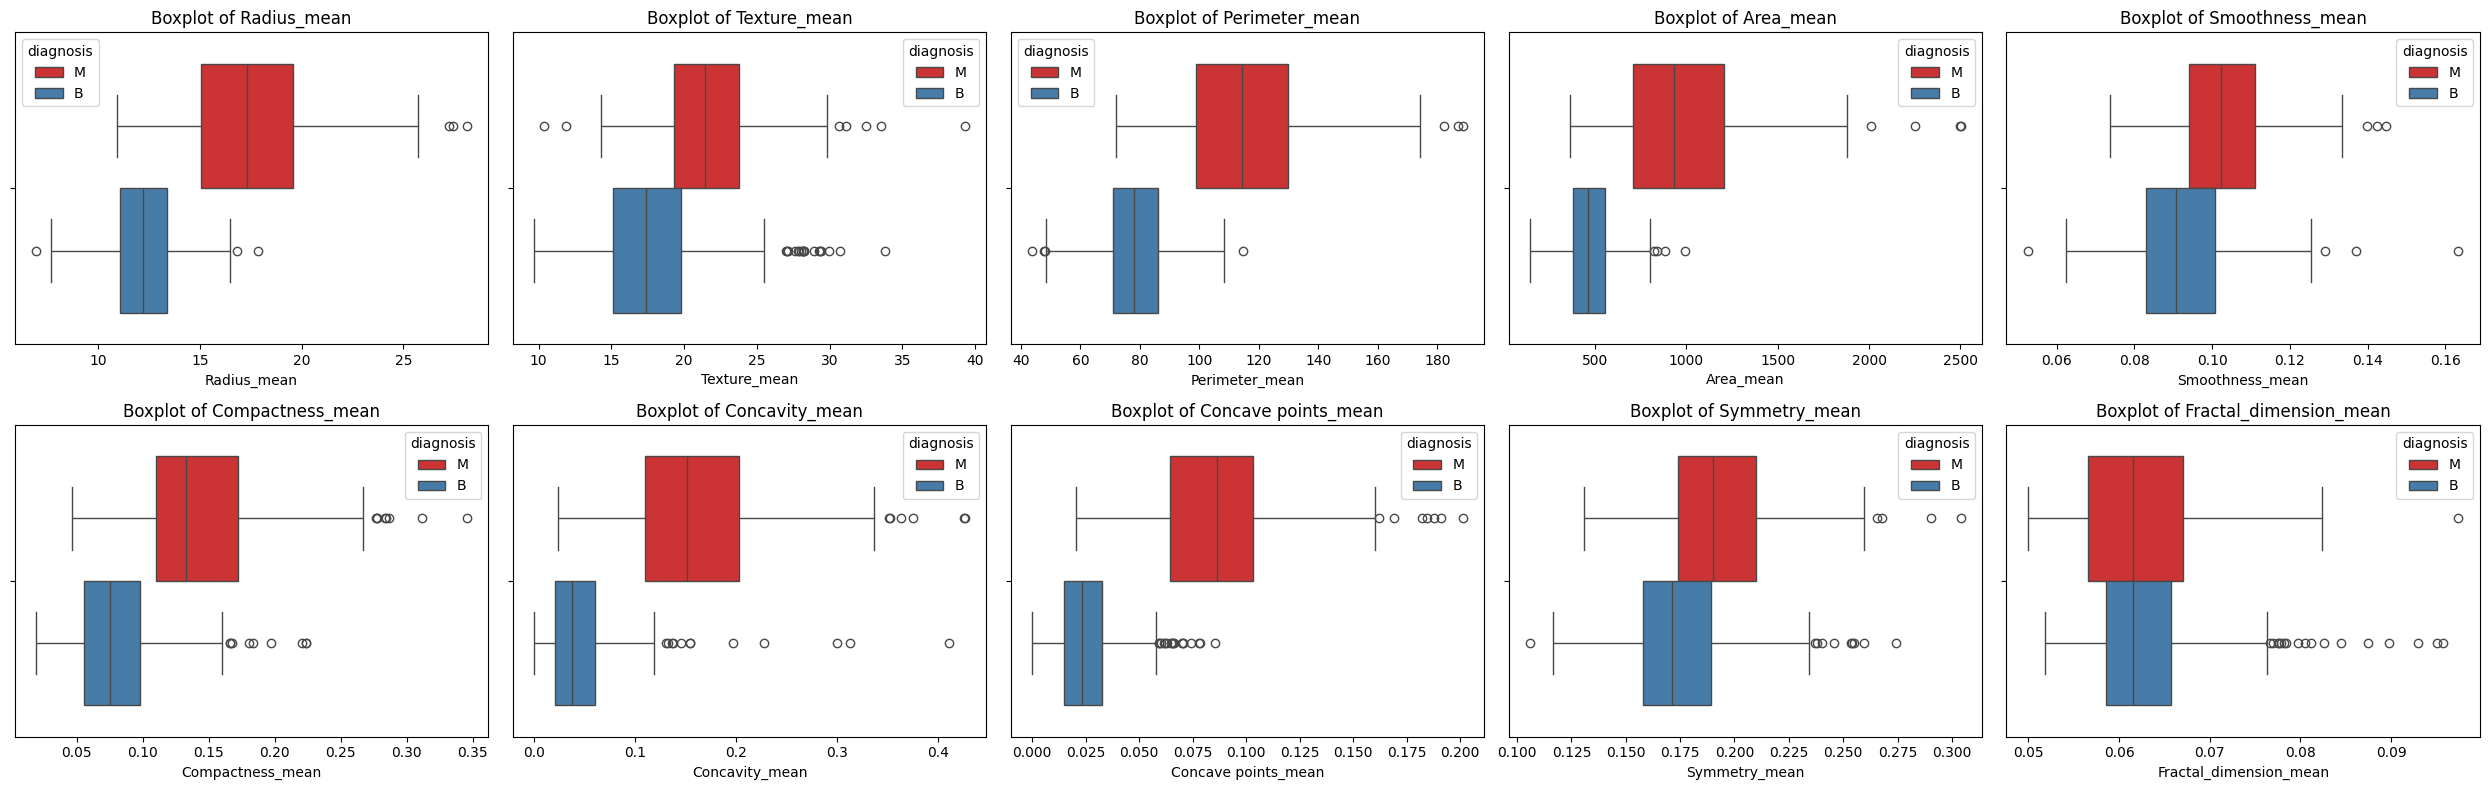

In [125]:
funs.boxplots(df, 2, 5, df.columns[2:12])

For most _mean features, such as `radius_mean`, `perimeter_mean`, `area_mean` and `concavity_mean`, we observed that malignant tumors often displayed a wider range of values, with some outliers above the upper quartile (Q3). On the other hand, benign tumors tended to have more tightly clustered data, but with much more outliers above Q3. Comparing the boxplots for the two types of tumors, we can deduce that distinguishing the type only focusing on `fractial_dimension_mean` seems complicated.

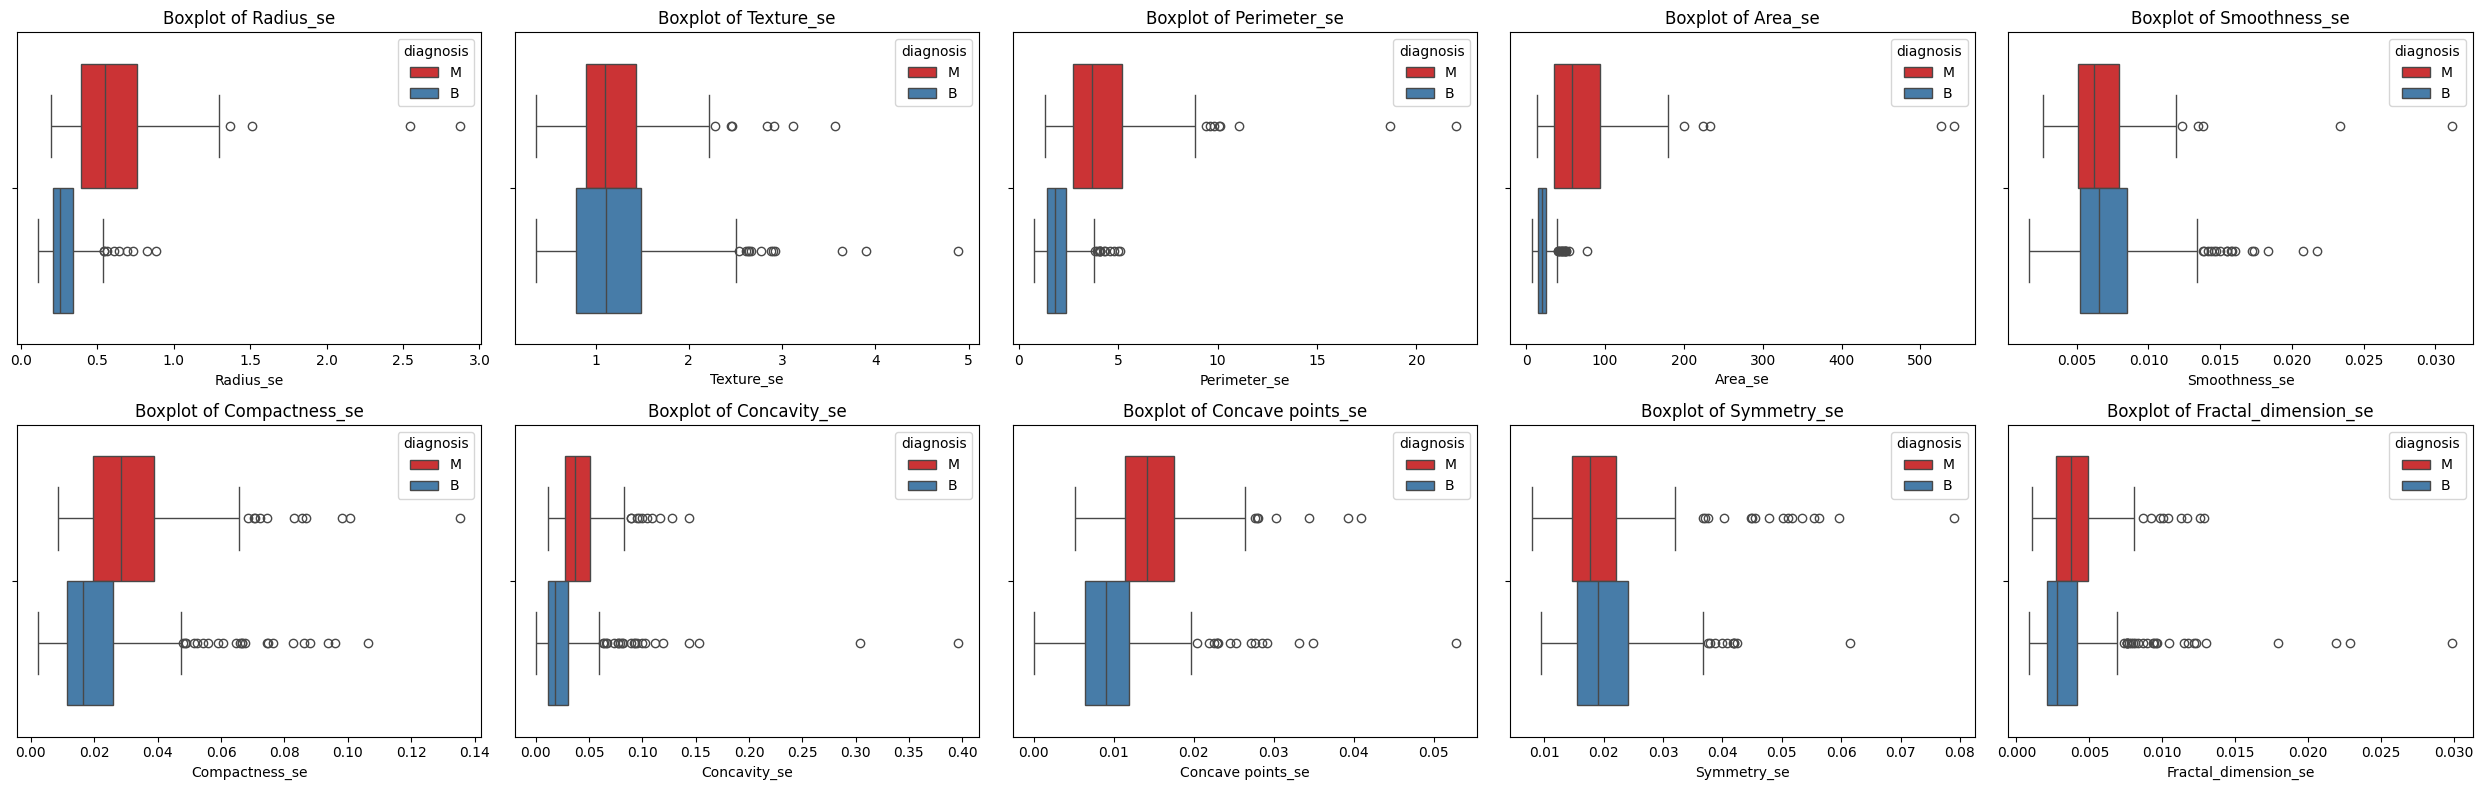

In [108]:
funs.boxplots(df, 2, 5, df.columns[12:22])

The _se features exhibited more variability in the malignant group. This suggests that the standard error for malignant tumors varies more than for benign tumors.

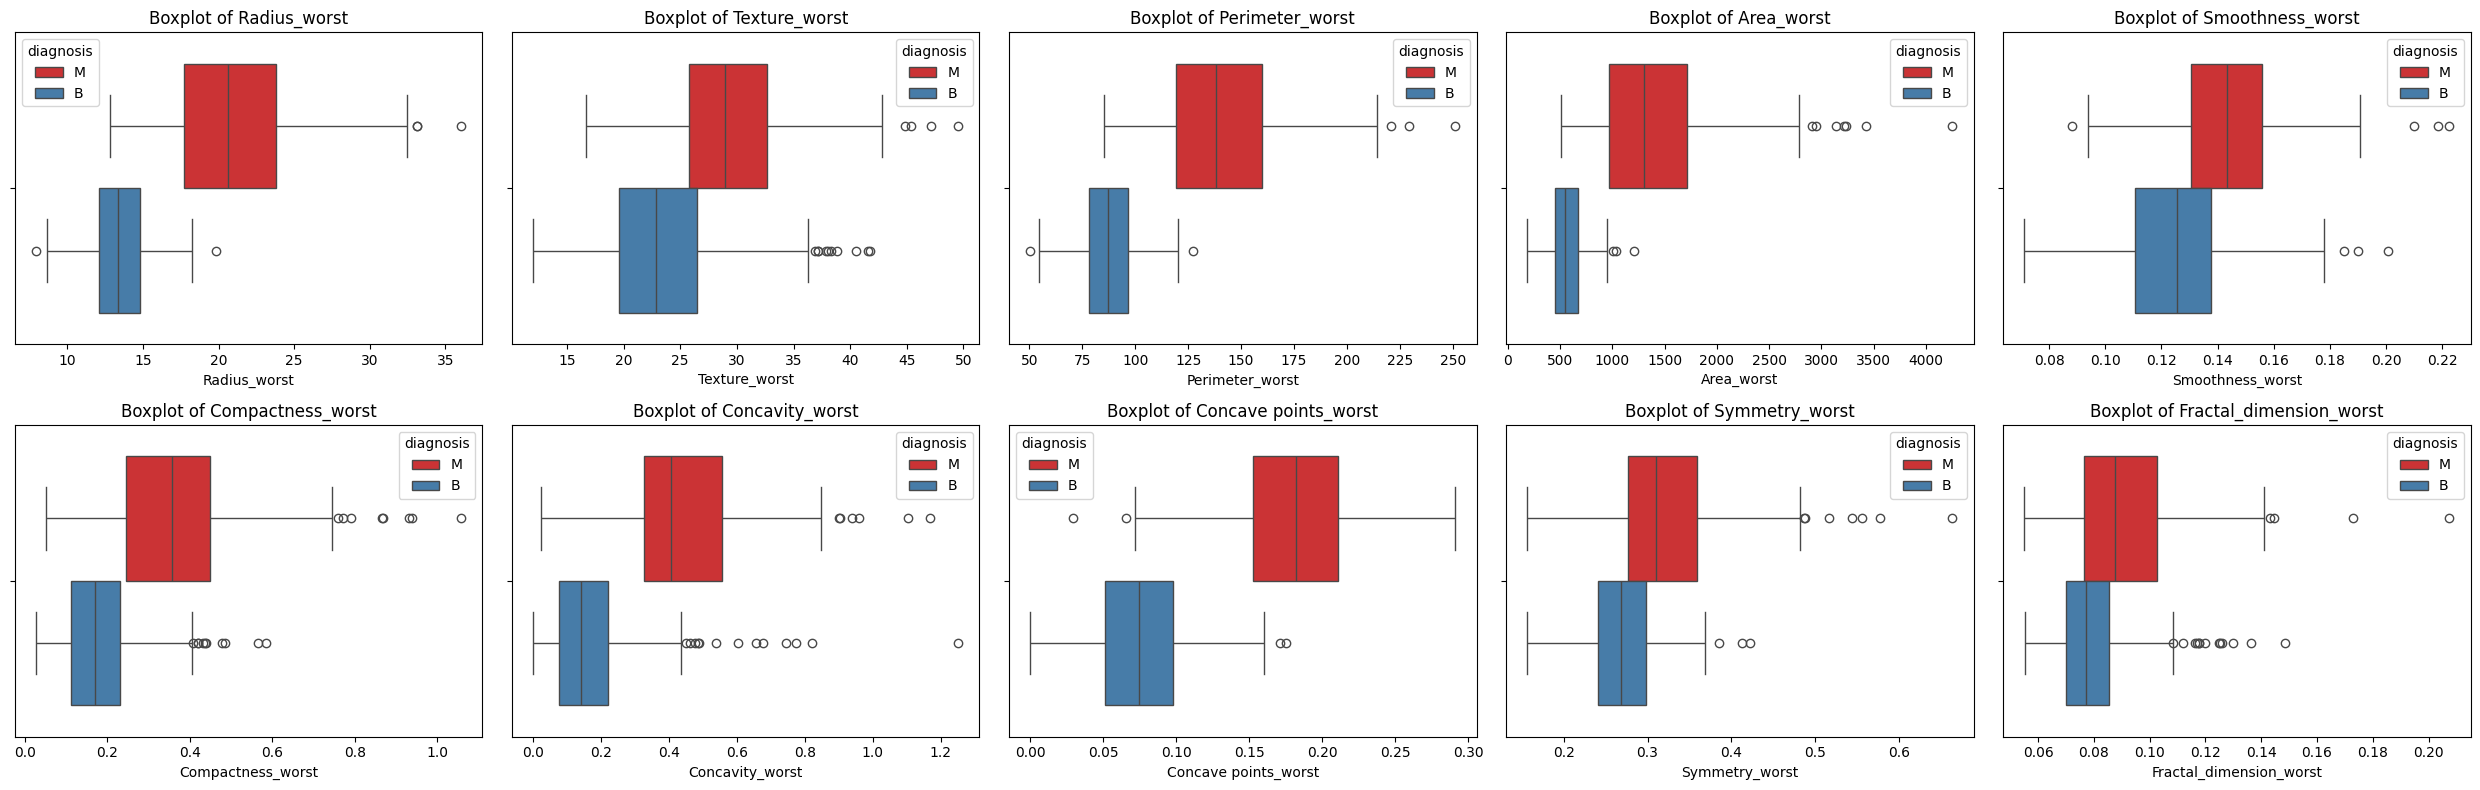

In [109]:
funs.boxplots(df, 2, 5, df.columns[22:32])

For all the _worst features, malignant tumors tend to have higher median values and a broader range of values, indicating greater variability and larger sizes or more extreme measurements. On the other hand, tend to have more concentrated values. Focusing on `area_worst` feature, we can observe that malignant tumors exhibit a broader distribution of values, suggesting more severe growth characteristics. This is particularly evident in the boxplot for this feature, where the range for malignant tumors is visibly larger compared to benign tumors. 

Histograms and density plots are powerful tools for visualizing the spread of data points across different categories, and they can offer insights into how each feature behaves in relation to the diagnosis.

The `distributions` function was created to allow a clear visualization of the distributions of specific numerical features across the two diagnosis groups (benign and malignant).

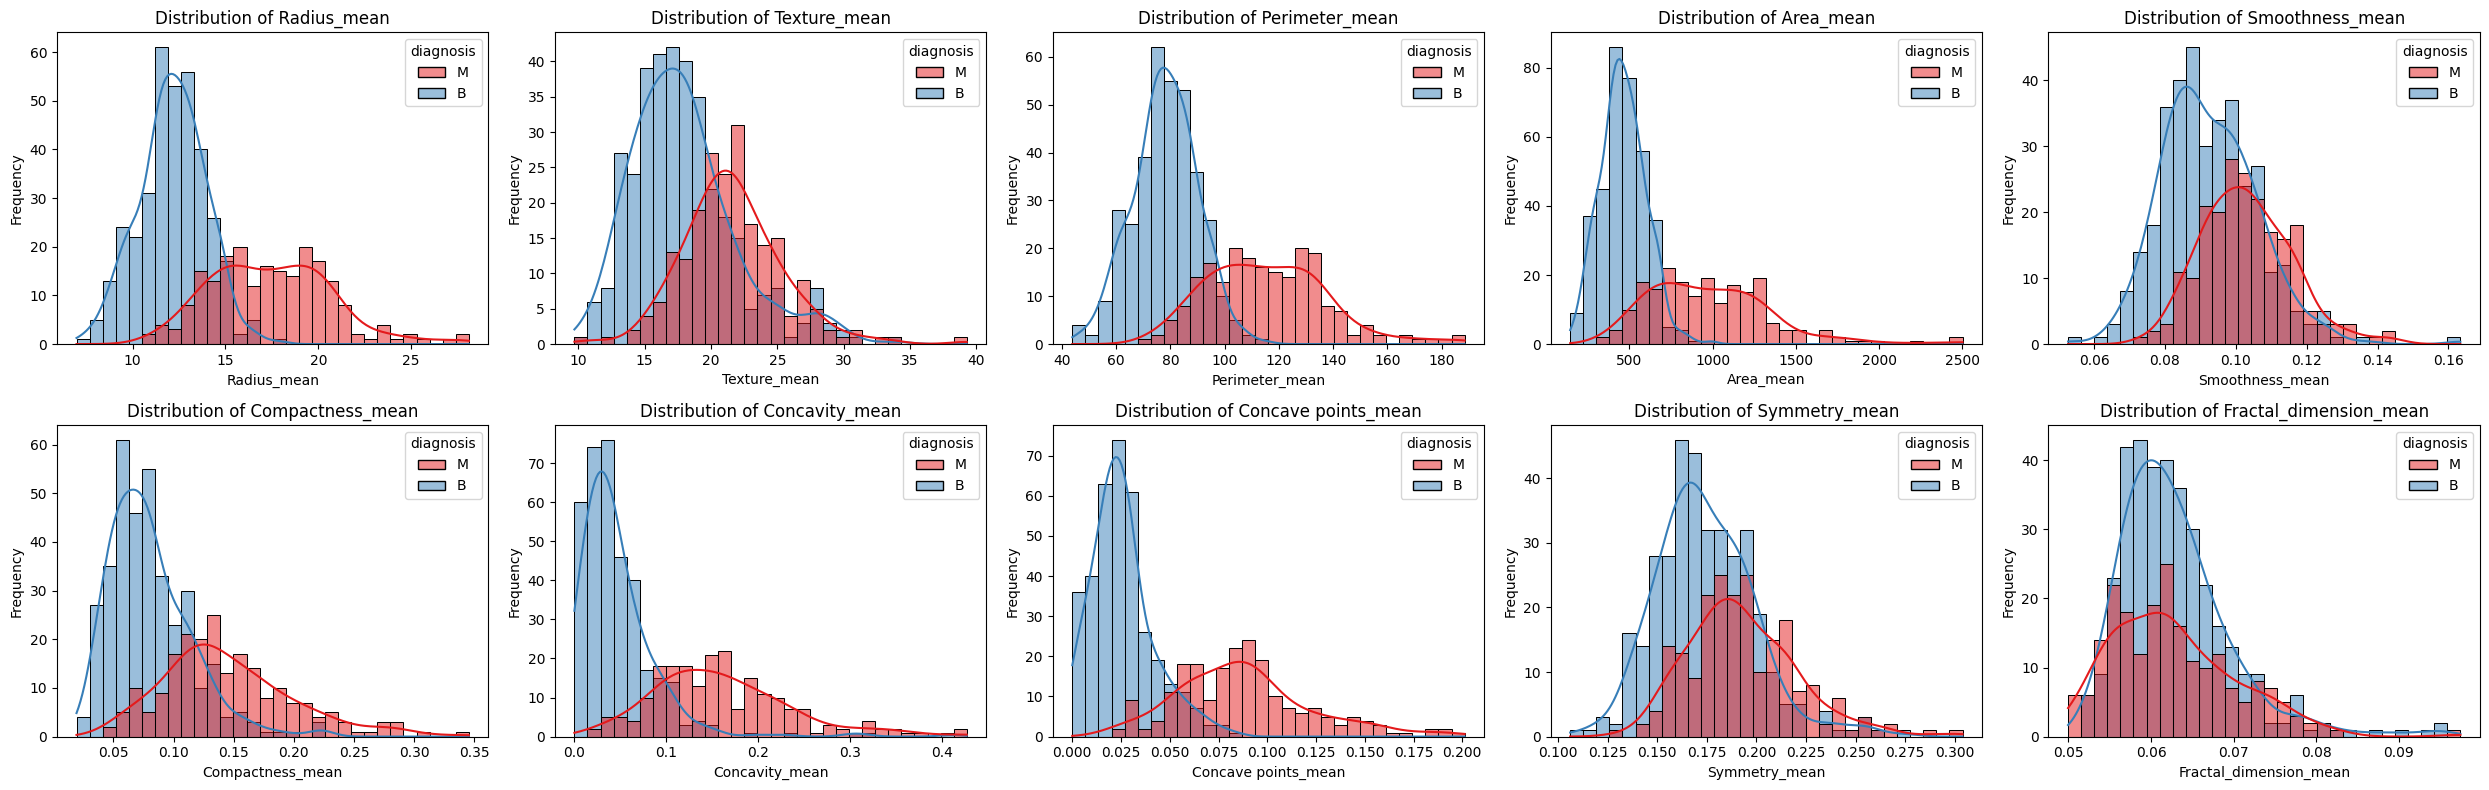

In [105]:
funs.distributions(df, 2, 5, df.columns[2:12])

Upon analyzing the distributions of the _mean columns, it becomes evident that the distribution of benign cases in each column is more concentrated and tends to be skewed to the left of the mean. This suggests that for benign cases, the values are more tightly clustered around a lower range. This leftward skew in the benign cases indicates that, in general, benign instances are classified with more consistency, often scoring lower than their malignant counterparts on the metrics being analyzed.

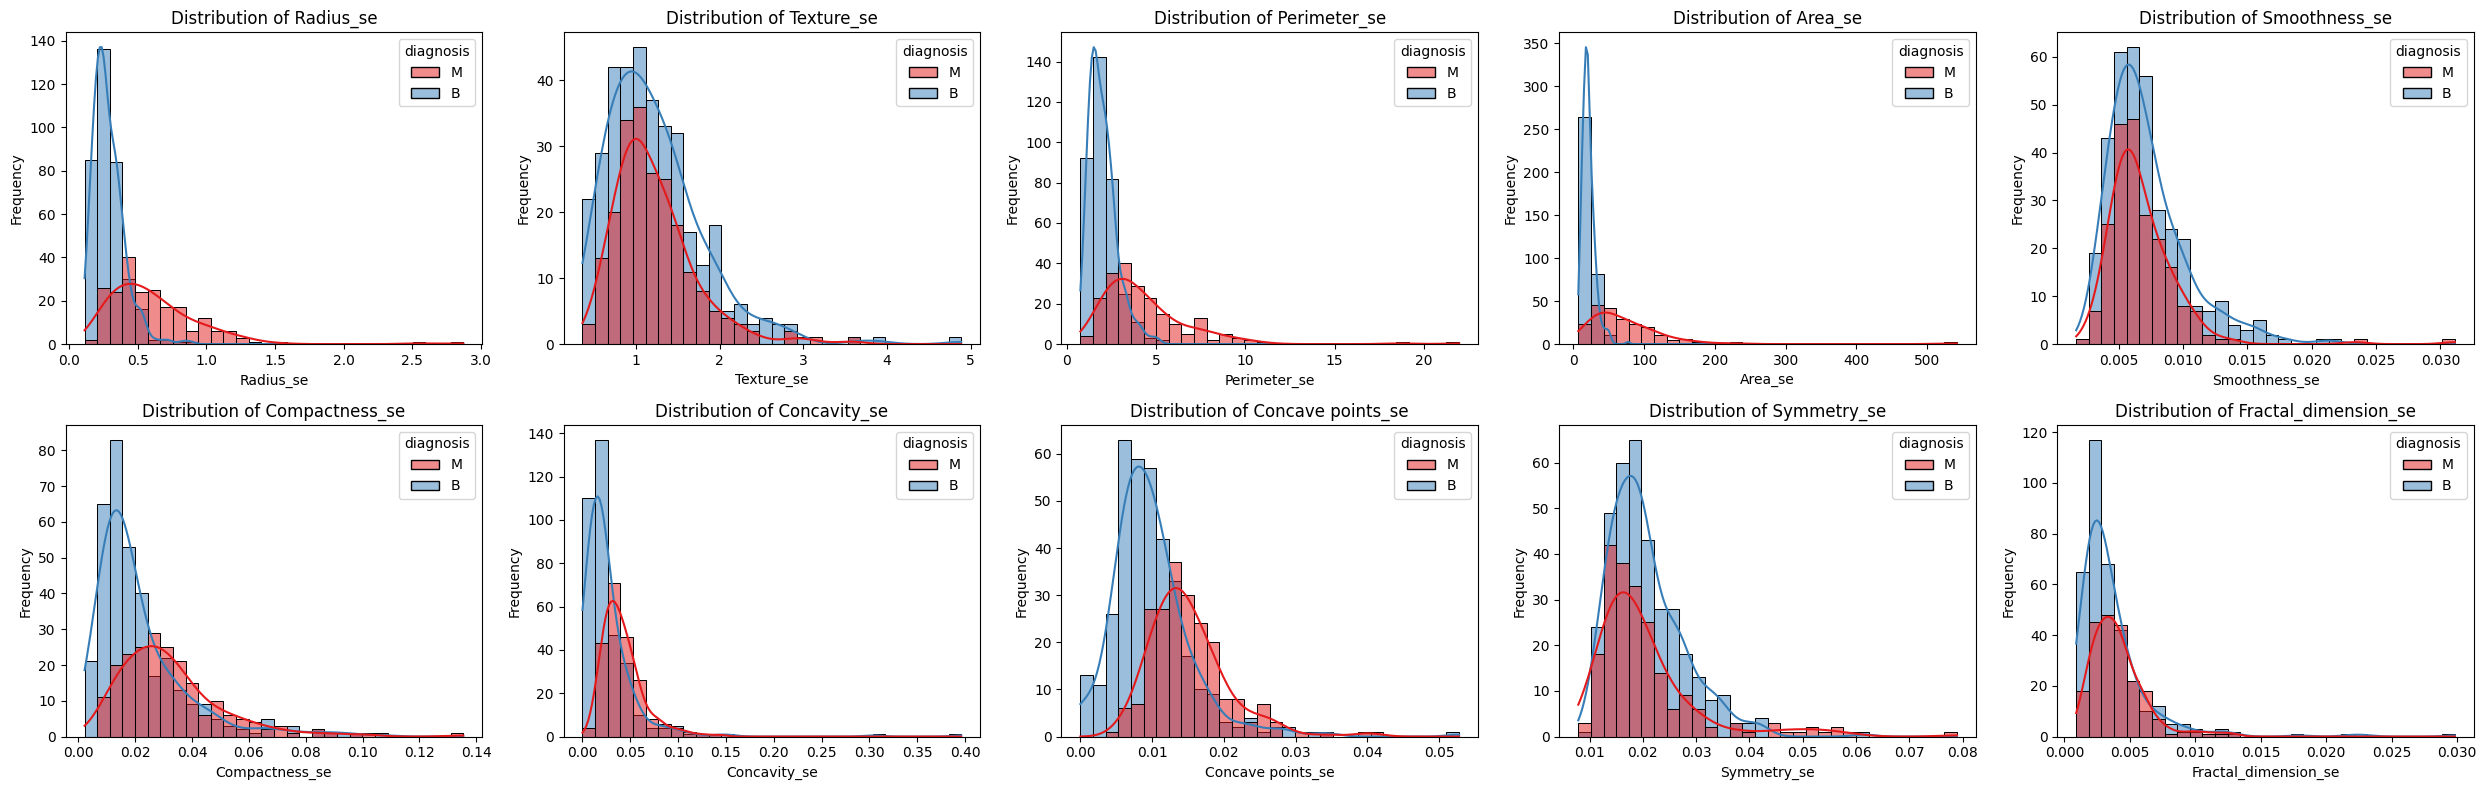

In [110]:
funs.distributions(df, 2, 5, df.columns[12:22])

The distributions for the _se features behave similarly to the _mean features, with one key difference: the distributions for benign and malignant cases seem to overlap more closely, making it harder to distinguish between them. For example, in features like smoothness_se and texture_se, the distributions of benign and malignant cases are much more similar and are not easily separable.

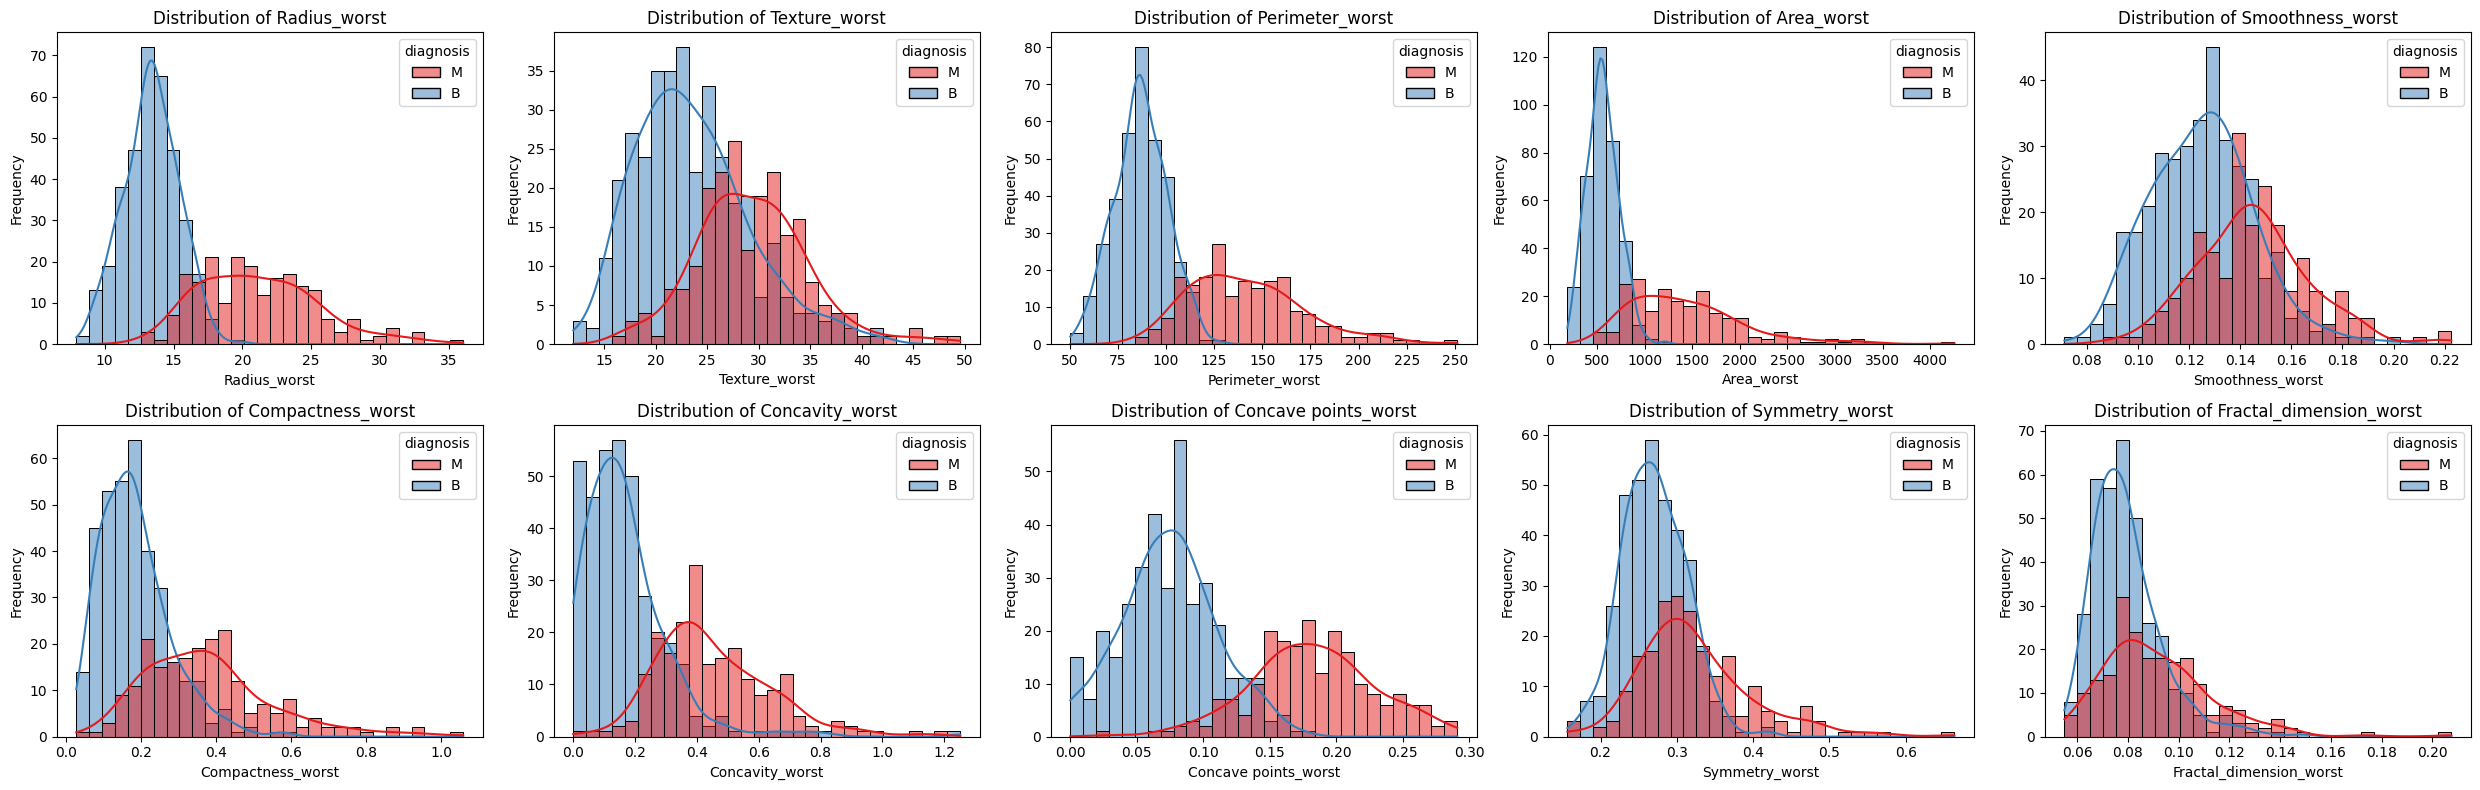

In [111]:
funs.distributions(df, 2, 5, df.columns[22:32])

For the _worst features, their distributions exhibit a very similar behavior to the _mean features. This makes sense because the worst value for each column directly influences the average (mean) value reported in the _mean features. In other words, since the worst value represents an extreme in the dataset, it has a significant impact on the overall calculation of the mean for that feature.

Since the distribution of the `diagnosis` feature cannot be directly visualized, we will examine how many values of "M" and "B" are present in the dataset. This analysis will help us determine if the classes are imbalanced, which is important to know because it may affect the performance of certain predictive models, as this feature will be treated as the target variable of prediction.

By using the defined function `categ_plots`, both the countplot and pie chart are generated, providing a visual representation of the values of the target variable in the dataset.

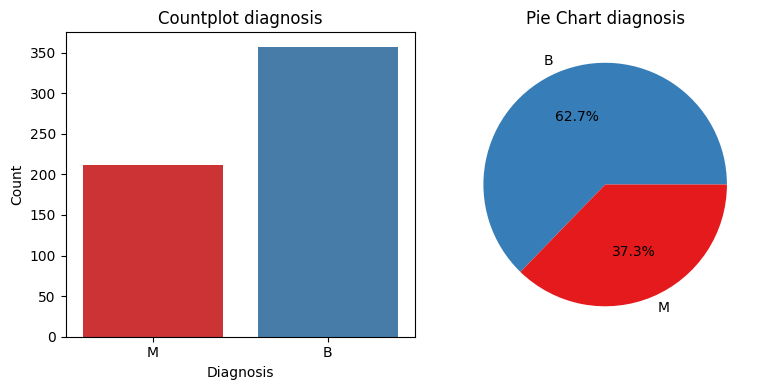

In [131]:
funs.categ_plots(df, "diagnosis")

The number of B samples (62.7%) is noticeably higher than the malignant ones, indicating that the classes in the target variable are imbalanced.

No representation of the `id` feature is provided, as it lacks semantic meaning. The values serve purely as identifiers, and any apparent patterns would not yield meaningful insights.

### 2.3. Exploring relationships between features

To visualize relationships between multiple variables simultaneously, we are going to use the powerful method of _Seaborn_ called `pairplot`. This method generates pairwise scatterplots for each combination of variables, and on the diagonal, it is displayed the distribution of each feature. In order to avoid cluttering the image, only the plots below the main diagonal will be represented.

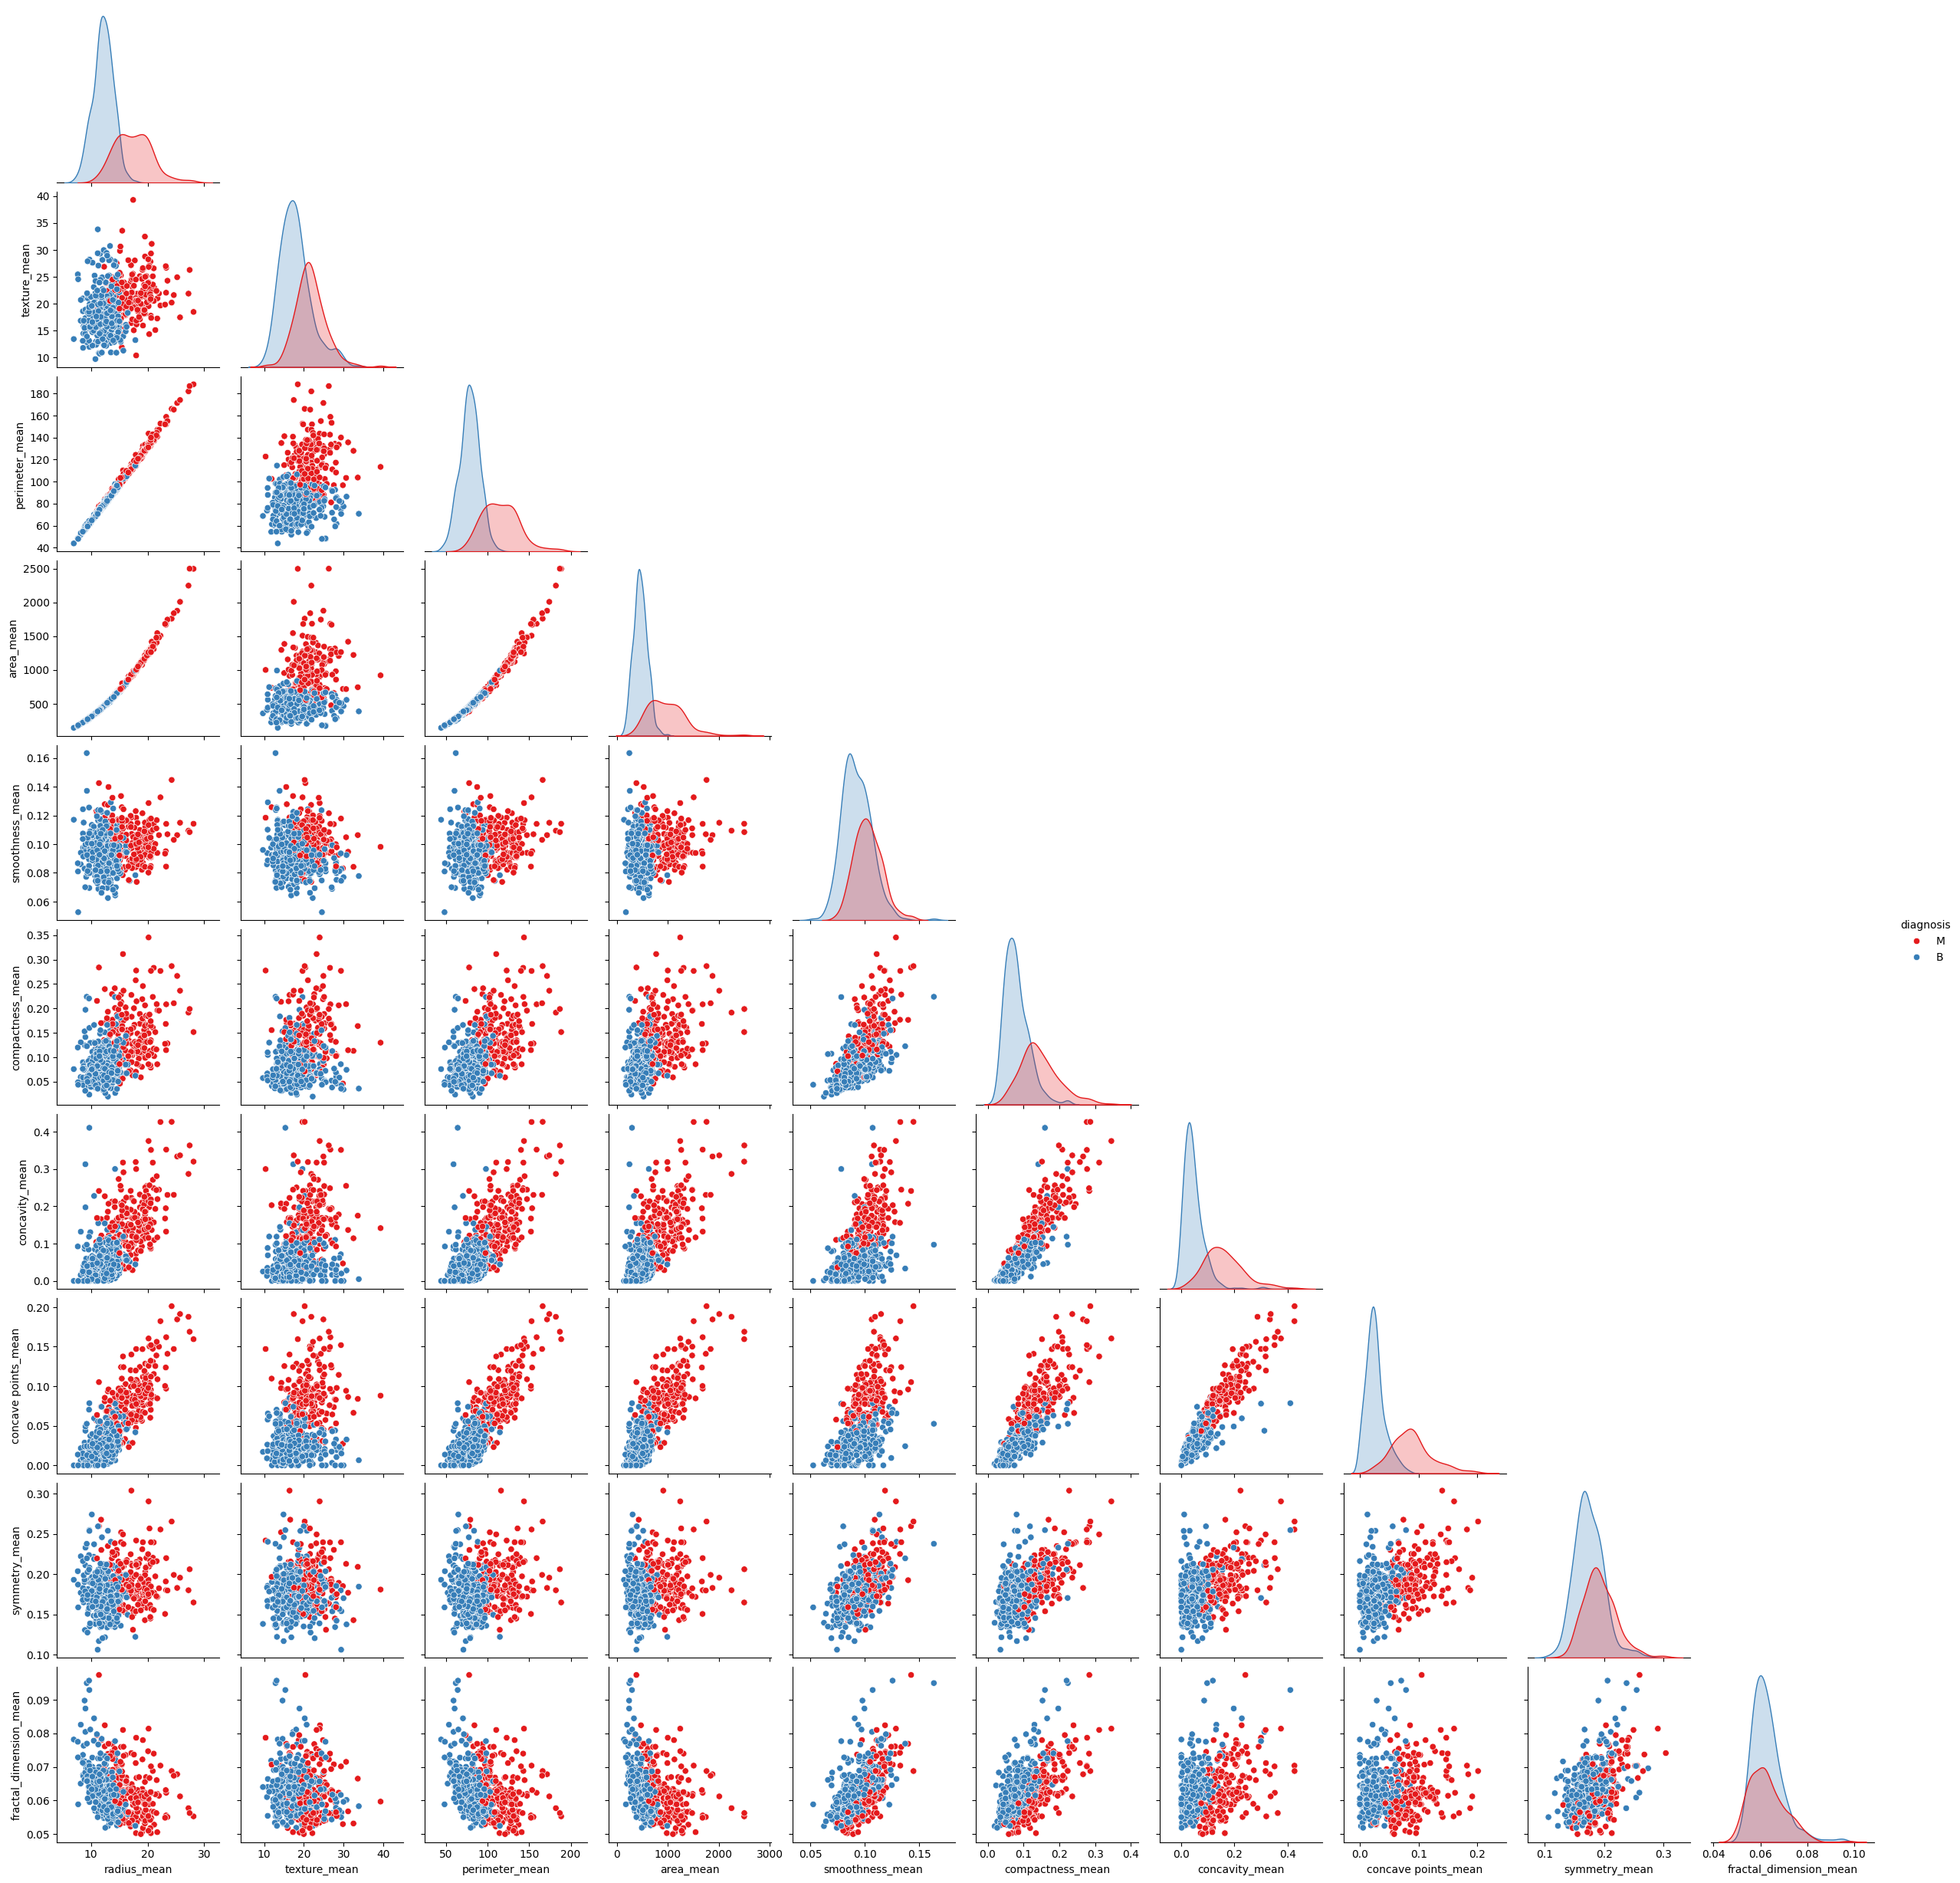

In [ ]:
sns.pairplot(df, vars=df.columns[2:12], hue="diagnosis", corner=True, palette="Set1");

 In the pairplot of the _mean features, we see a clear separation between benign and malignant tumors. The malignant tumors tend to show higher values in some features  while the benign tumors are concentrated towards the lower end of these values. The scatterplots reveal that malignant tumors, especially those with larger values in the mean features, are distinctly separated from benign tumors. 

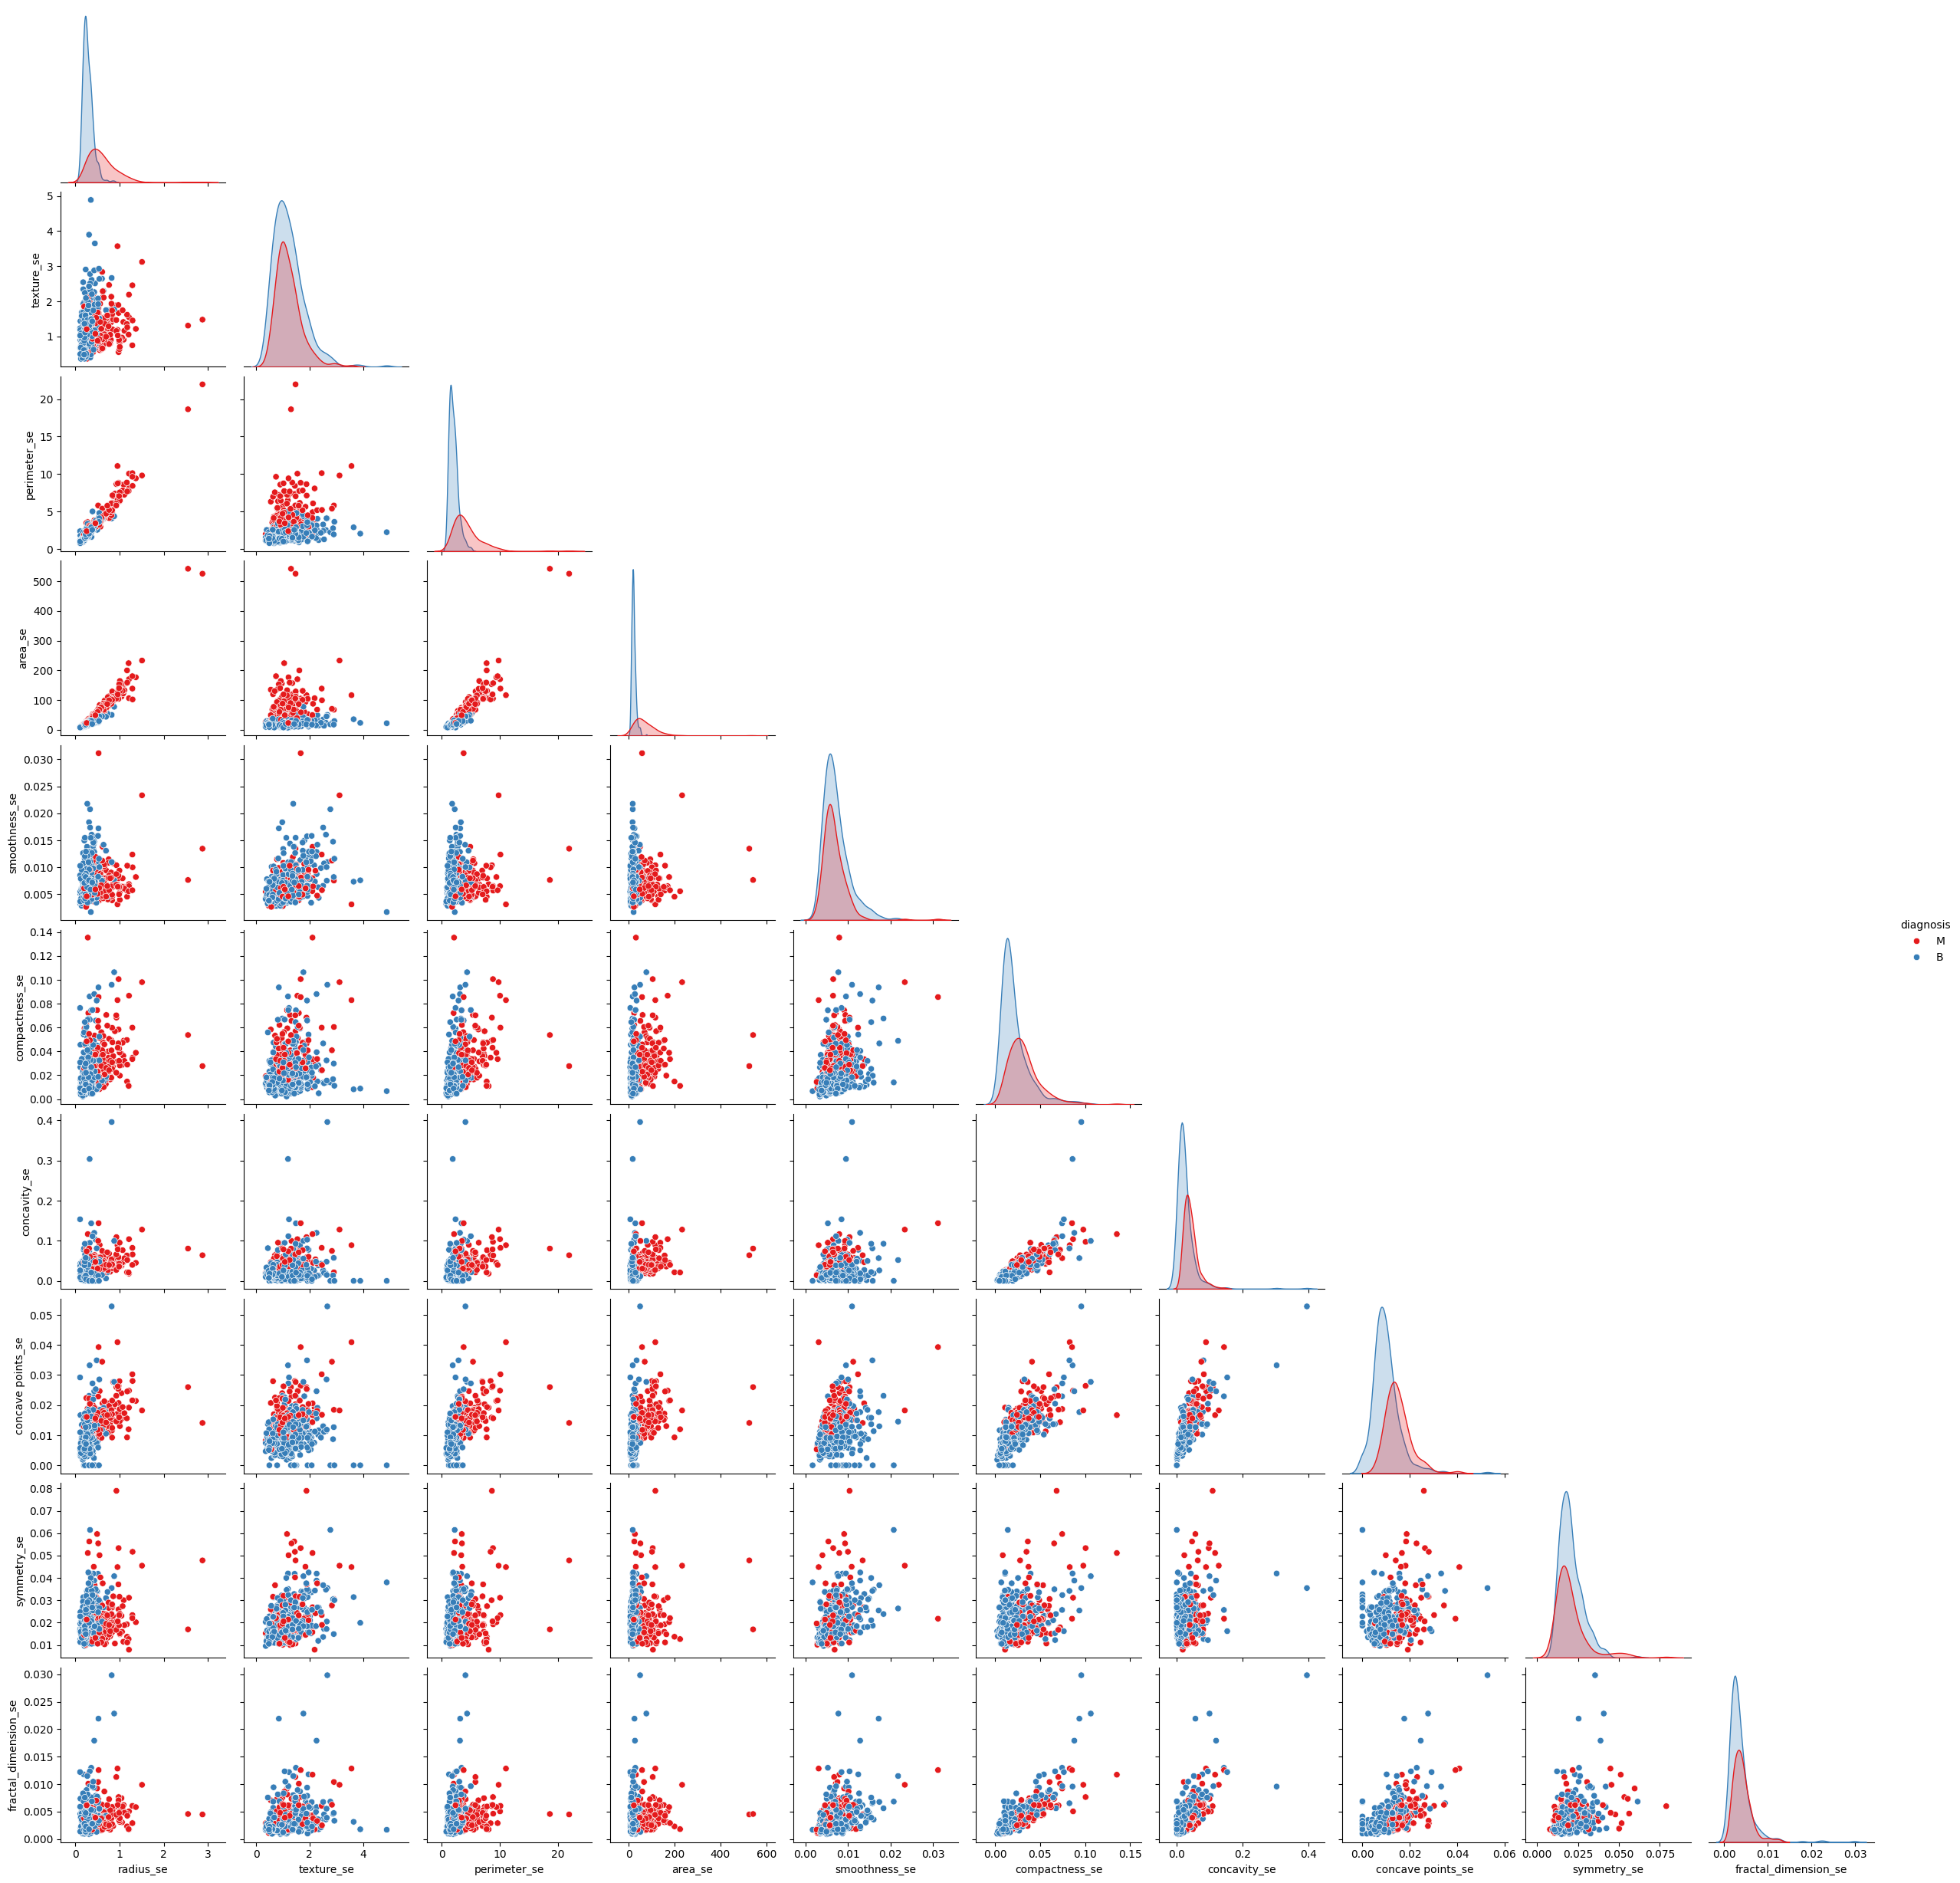

In [22]:
sns.pairplot(df, vars=df.columns[12:22], hue="diagnosis", corner=True, palette="Set1");

In the _se pairplots, the separation between malignant and benign tumors is less pronounced compared to the _mean features. However, the scatter plots still show some clustering, with malignant tumors generally having higher values in features like `radius_se`, `perimeter_se`, and `area_se`. 

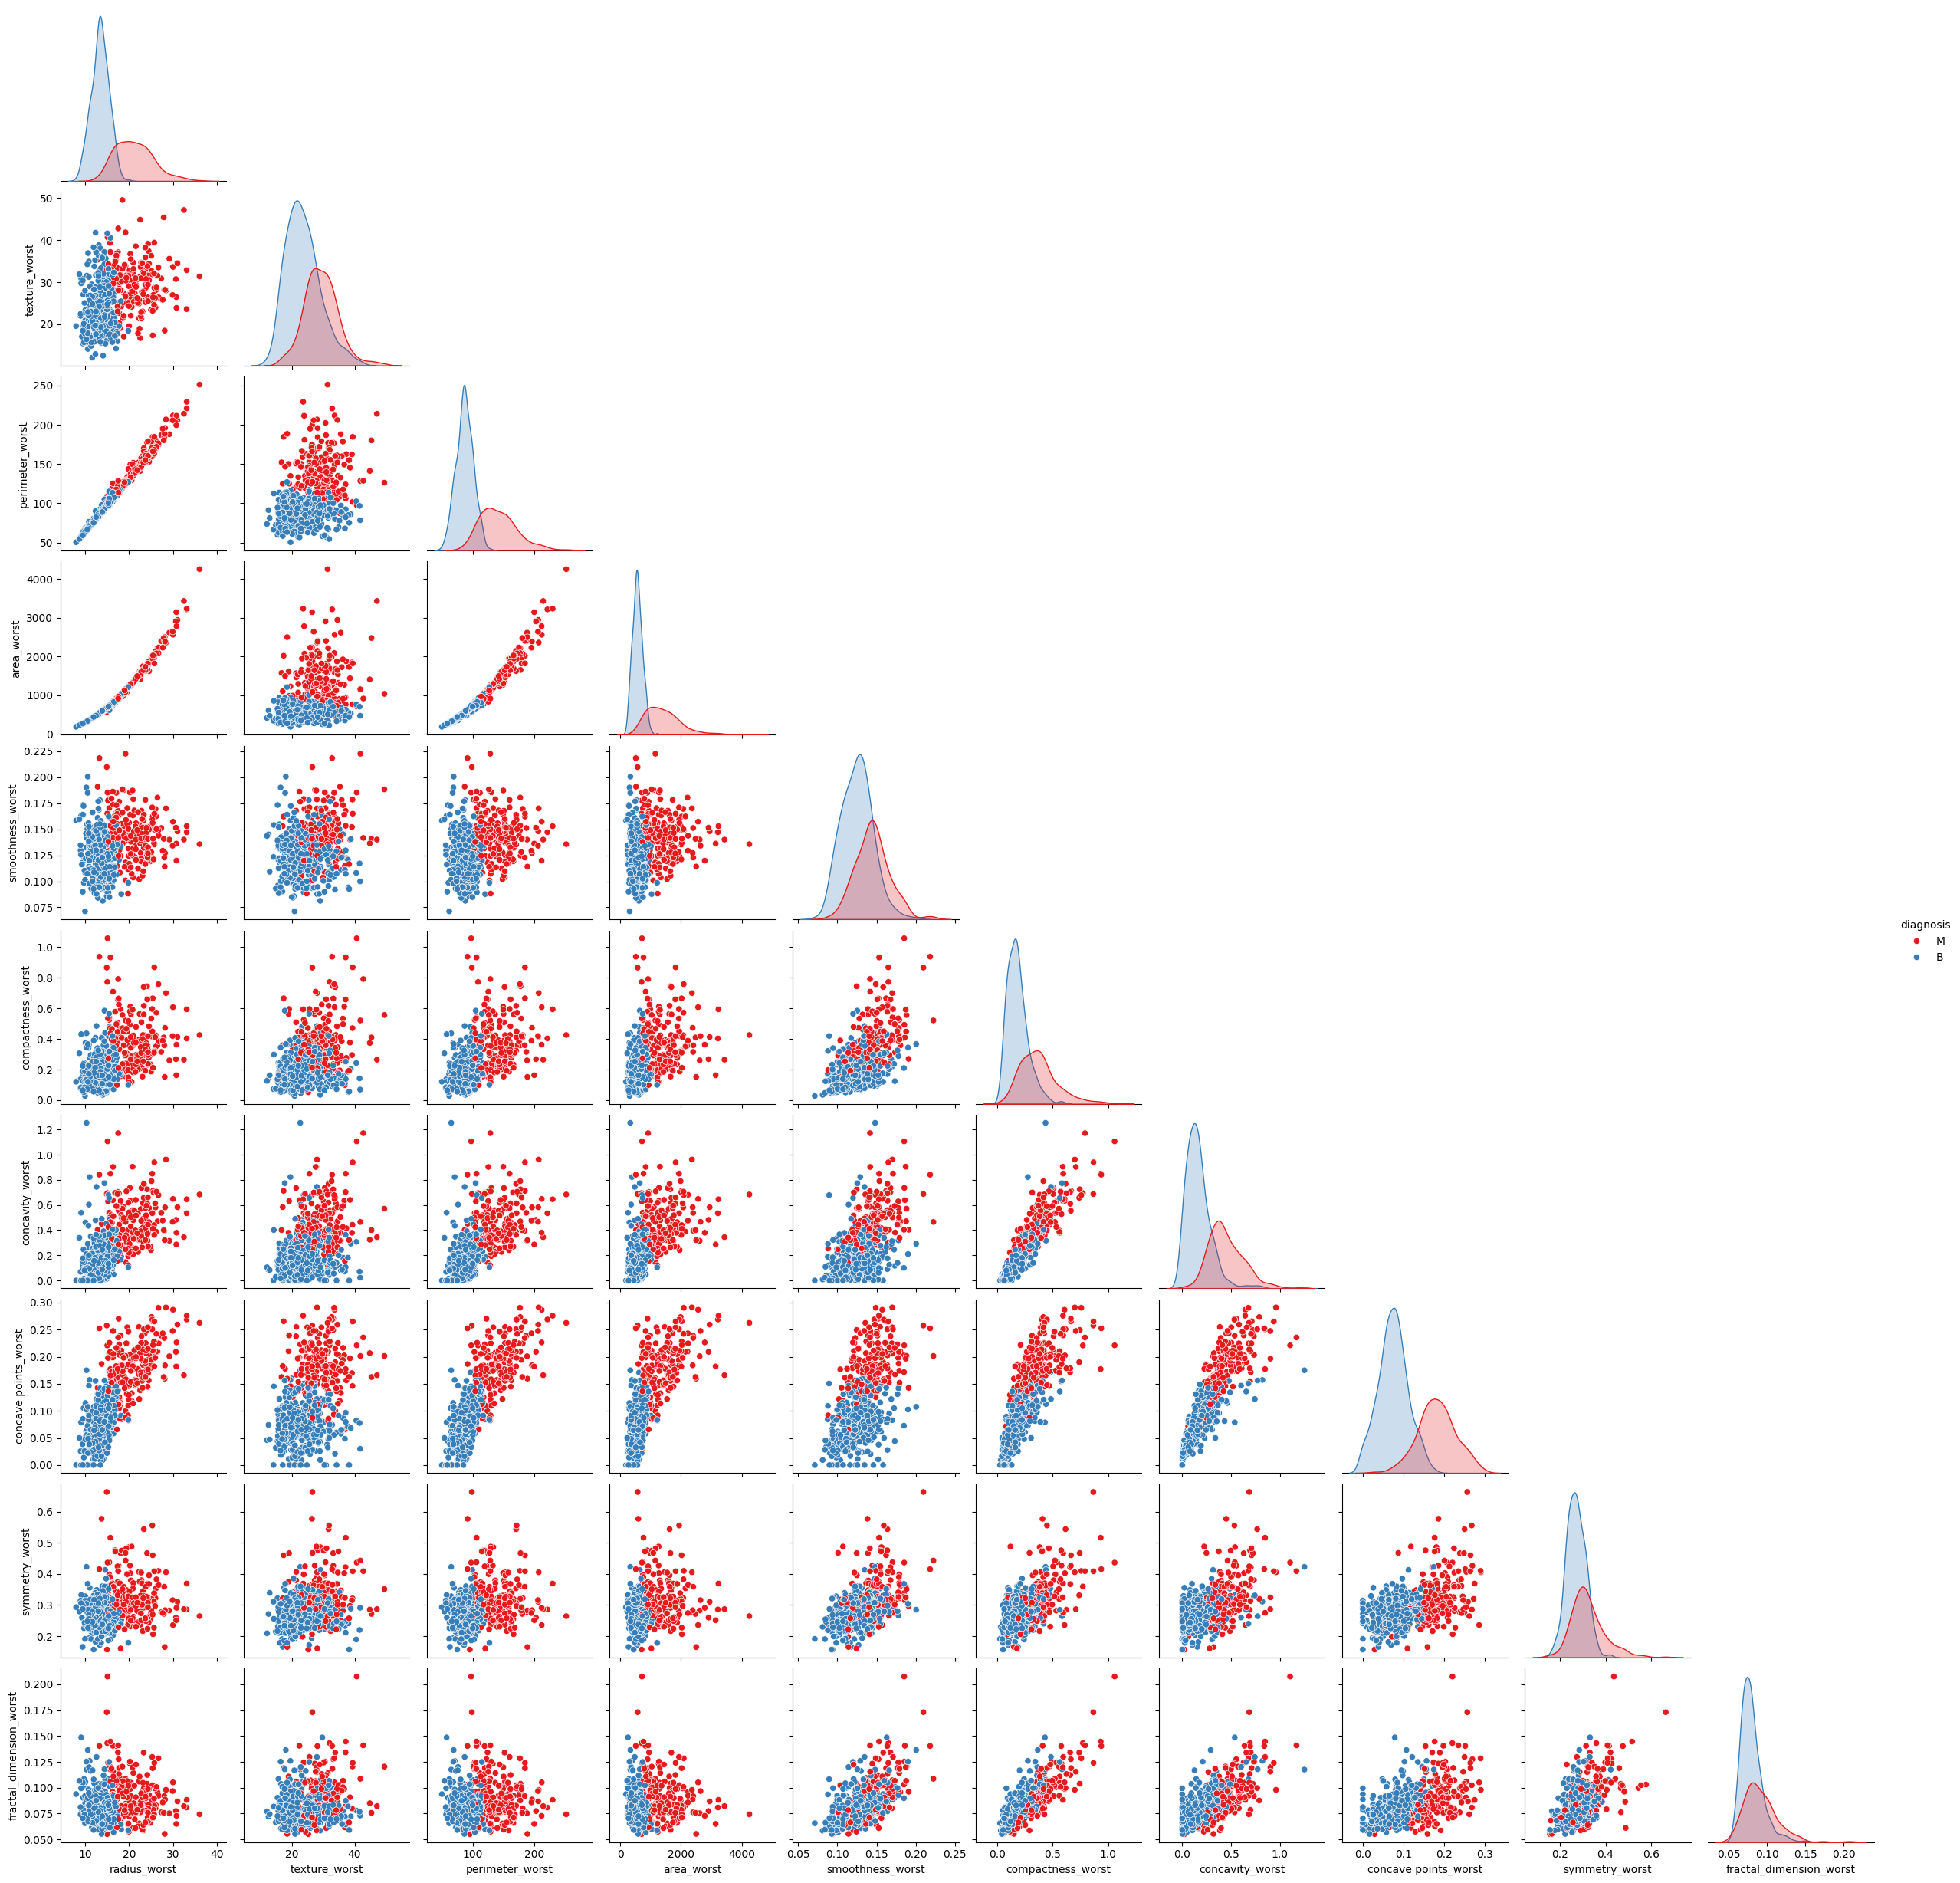

In [23]:
sns.pairplot(df, vars=df.columns[22:32], hue="diagnosis", corner=True, palette="Set1");

The pairplot for _worst shows a more distinct separation between benign and malignant tumors compared to _se.

Note that the relationships between radius, perimeter, and area in all three cases appear to follow either linear or exponential patterns, as they are interdependent, meaning they are closely related and tend to influence each other. These features have a geometric relationship, where changes in one feature directly affect the others.

Now, we will examine the correlation between the variables both quantitatively and visually, instead of relying solely on visual inspection. A heatmap of the correlation matrix will be presented next to assess the relationships between the features. 

Before using the `correlation_heatmap` function to compute the correlation matrix, it is necessary to convert the `diagnosis` column to a numerical format, as it is currently categorical. In order for this column to contribute to the correlation analysis, we will employ the `apply()` method with a `lambda` function. This function will replace the "benign (B)" cases with 0 and the "malignant (M)" cases with 1, enabling us to include it in the correlation calculation.

In [133]:
df["diagnosis"] = df["diagnosis"].apply(lambda x: 0 if x == "B" else 1)

In the cell below, we check using `info_df` function that the data type of the `diagnosis` column has been successfully modified.

In [28]:
funs.info_df(df, types=True)

DataFrame Information:
- Rows: 569
- Columns: 32
- Numerical features: 32


Now, we apply the `correlation_heatmap` function.

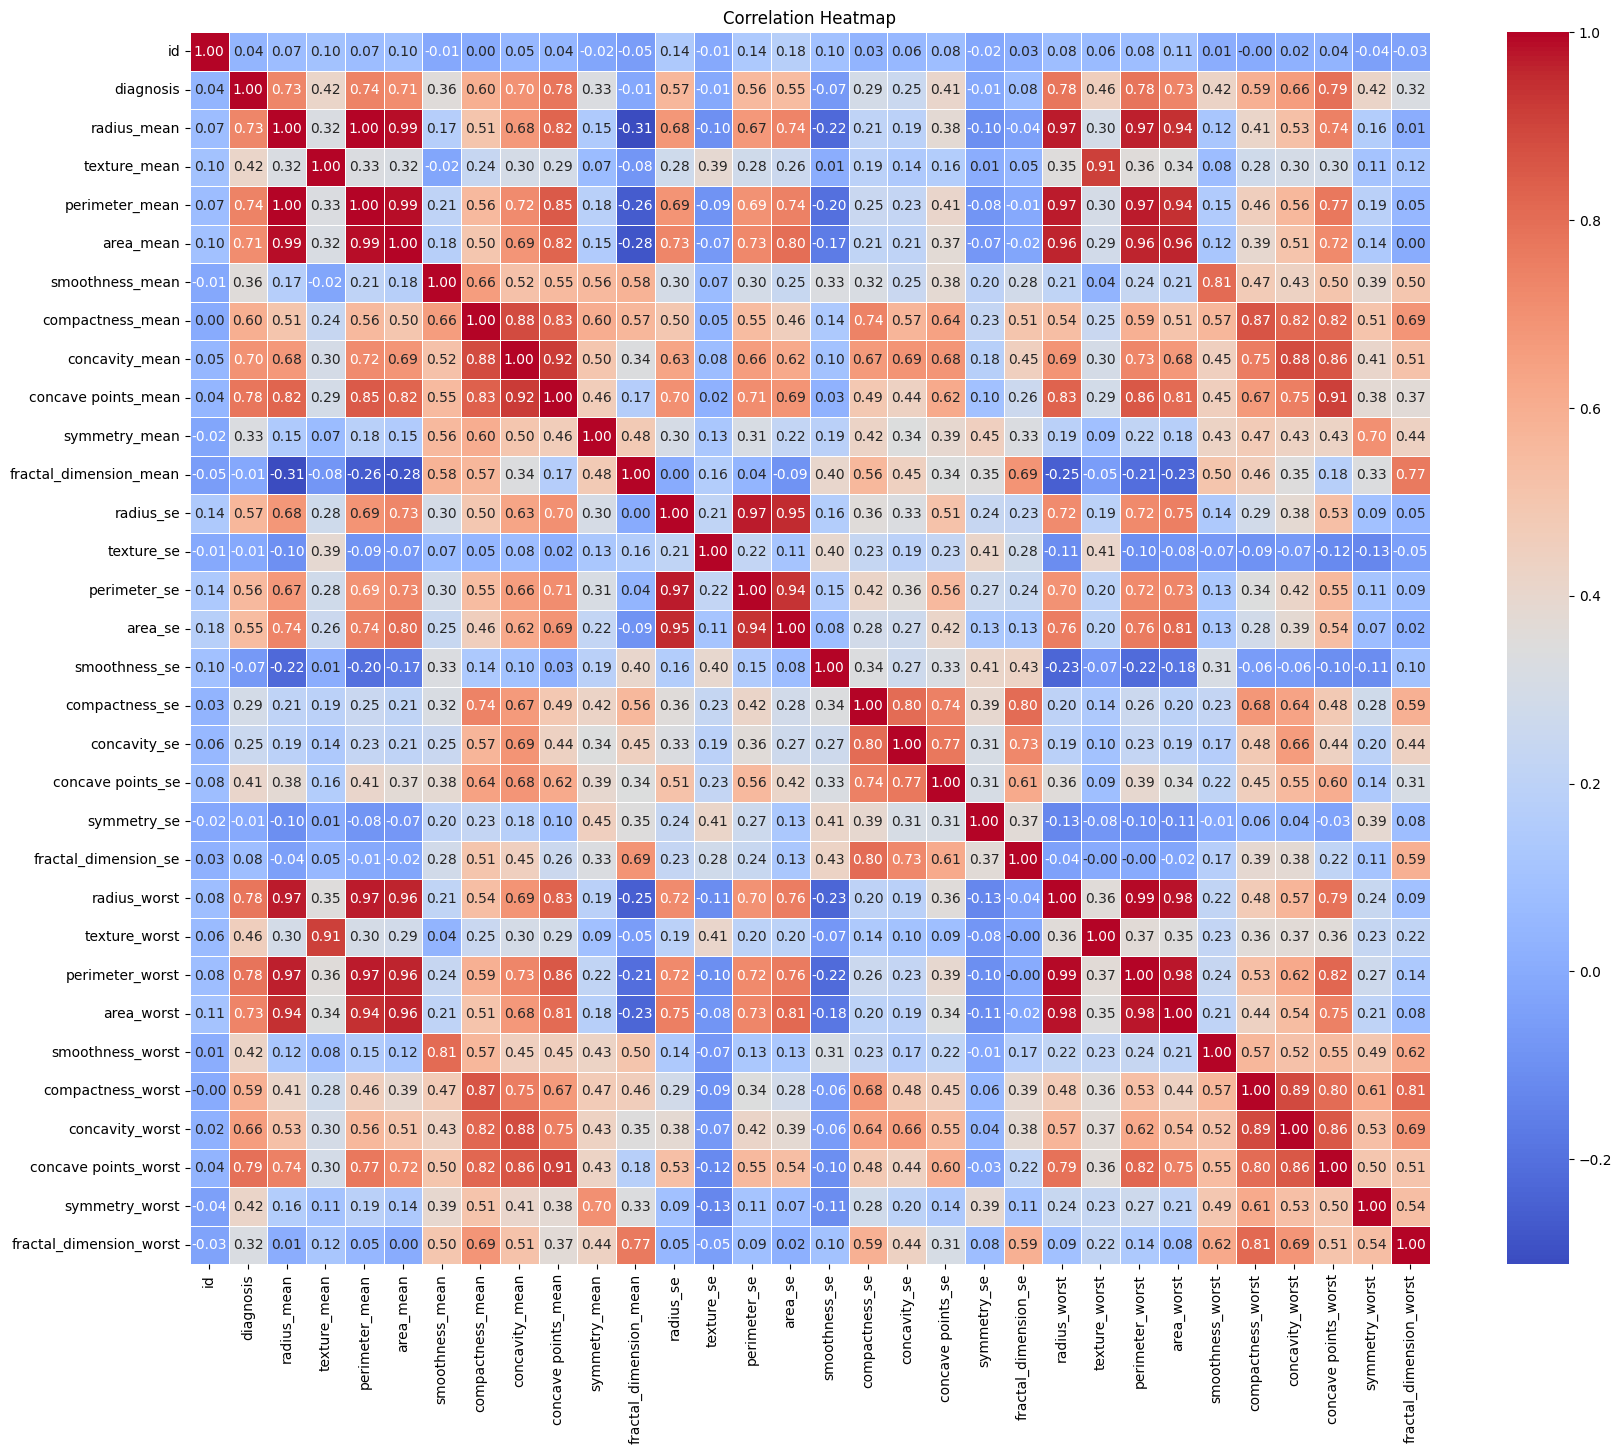

In [34]:
funs.correlation_heatmap(df)

As expected, there is a strong correlation between the features `radius`, `area` and `perimeter`. Additionally, the _mean and _worst versions of these features show similarly high correlations, as the worst value of every feature has contributed to calculate the mean. The correlation between `diagnosis` and all the other features will be discussed in the following section focused on predictive models.

The created function `correlation_heatmap` computes Pearson's linear correlation, but it is important to note that some features may exhibit stronger relationships that are not linear in nature.

## 3. Predictive models

The goal in this section is to build a model capable of forecasting future outcomes based on historical data. To achieve accurate predictions, we will explore a range of machine learning models, from traditional algorithms like logistic regression and decision trees to more complex ensemble methods like Random Forest and Gradient Boosting. Additionally, we will employ techniques for model evaluation, such as cross-validation and hyperparameter tuning, to ensure that the model we choose is robust, generalizable, and optimized for this task.

### 3.1. Features selection

To identify which features have the greatest influence on the target variable (`diagnosis`), we will focus on analyzing the correlation between the target and the other features. To achieve this, we will use the `correlation_heatmap` function and specify the `target` argument.

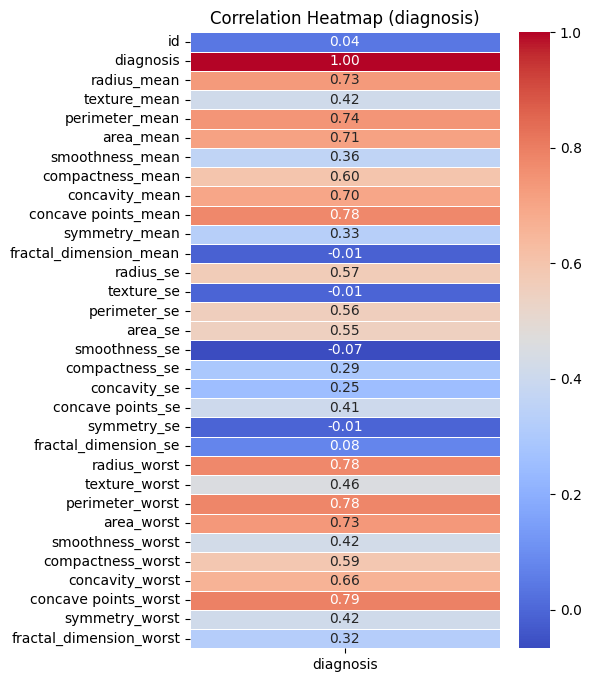

In [58]:
funs.correlation_heatmap(df, target="diagnosis")

After analyzing the Pearson correlation between the target variable and the remaining features, we have decided to adopt the following approach for feature selection:

- The features related to standard error do not contribute significantly to predicting diagnosis and will be excluded from the selection.

- For _mean and _worst features, we will select the one with the highest correlation to the target variable between both versions. However, we will not select both _mean and _worst for the same feature to avoid redundancy.

- Features like `radius`, `perimeter`, and `area` will not be selected together. As previously analyzed, these features are highly correlated with each other, and selecting all of them would lead to multicollinearity without adding new information. The same case happen with `concavity` and `concave points`.

It goes without saying that `id` will not be selected as a feature for the predictive models, due to its nature of merely distinguishing observations.

So, the selected features are: `perimeter_worst`, `concave points_mean`, `compactness_mean`, `symmetry_worst`, `smoothness_worst` and `texture_worst`. 

### 3.2. Preparation of features and models

First, we separate the DatFrame features into two sets: `X`, which contains the selected independent variables, and `y`, which holds the target variable.

In [ ]:
selected_feats = ["perimeter_worst", "concave points_mean", "compactness_mean", "symmetry_worst", "smoothness_worst", "texture_worst"]

X = df[selected_feats]
y = df["diagnosis"]

The next step is to split the data into four sets: `X_train`, `X_test`, `y_train` and `y_test`. This is done using the `train_test_split` function, where we specify that 20% of the data should be allocated to the test set. The `stratify` parameter is set to ensure that the distribution of the target variable  is consistent across both the training and test sets. This is important for handling class imbalance, as it ensures both sets have a similar proportion of benign and malignant cases, preventing biased model training.

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

Now, we use `StandardScaler` to standardize the dataset by removing the mean and scaling features to unit variance (z-score normalization). This ensures that all features contribute equally to the model and accelerates convergence during optimization.

In [191]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X.columns)

For instance, we will evaluate the performance of several machine learning models listed in the cell below to compare how they perform on the dataset.  This comparison will allow us to select the optimal model for the given task. The structure of the `models` variable as a dictionary, where the key is the model name and the value is the model instance, is not accidental. This design is specifically intended to facilitate passing the models as arguments to the functions detailed in _Section 3.3._.

In [331]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Naive Bayes": GaussianNB()
}

The selected machine learning models are diverse, ranging from traditional ones to ensemble methods. However, a neural network has not been used due to the limited amount of data available. Neural networks typically require a large volume of data to perform well, and with a smaller dataset, they may not yield optimal results.

### 3.3. Predictive models results

The output of the cell above displays the confusion matrix for each model in the `models` dictionary and generates graphs that show the model performance ranked in descending order based on the accuracy and F1 metrics. The `train_and_evaluate` function trains each model, prints the plot with the confusion matrix figures, and returns a dictionary containing the accuracy and F1 scores for each model. This allows the `plot_model_metrics` function to visually arrange the models according to the specified metrics, making it easier to compare their performance.

The decision to return only accuracy and F1 scores, rather than precision and recall as well, was made because the F1 score is the harmonic mean of precision and recall. By analyzing this value, we can already infer the performance of both precision and recall. Since F1 encapsulates the balance between precision and recall in a single metric, it provides a clear indication of model effectiveness while avoiding the redundancy of displaying both precision and recall separately.

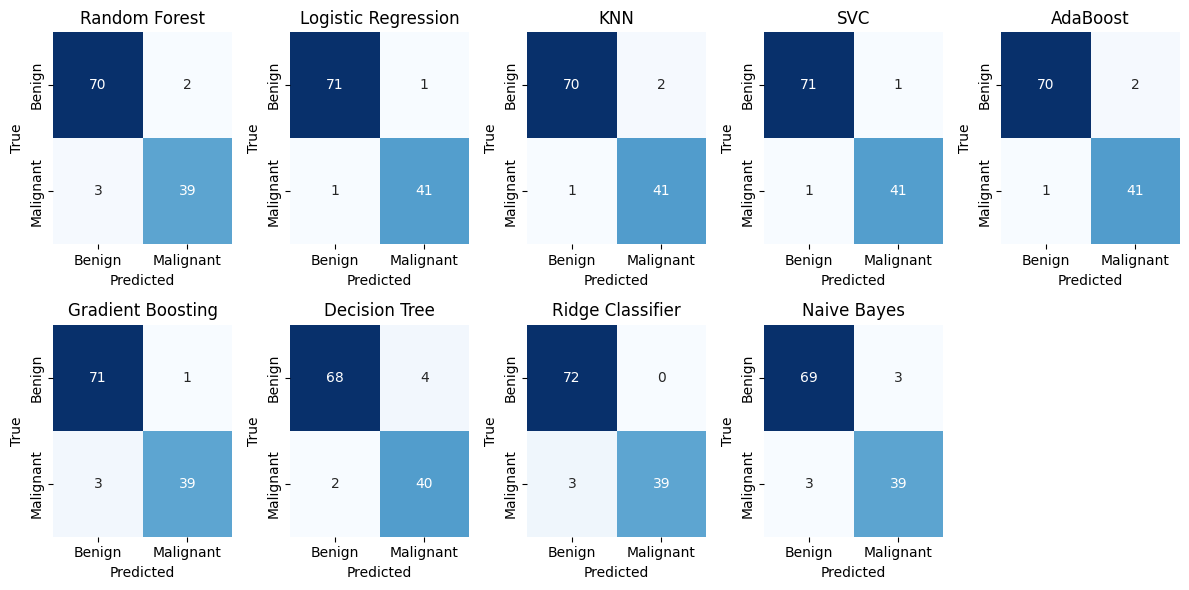

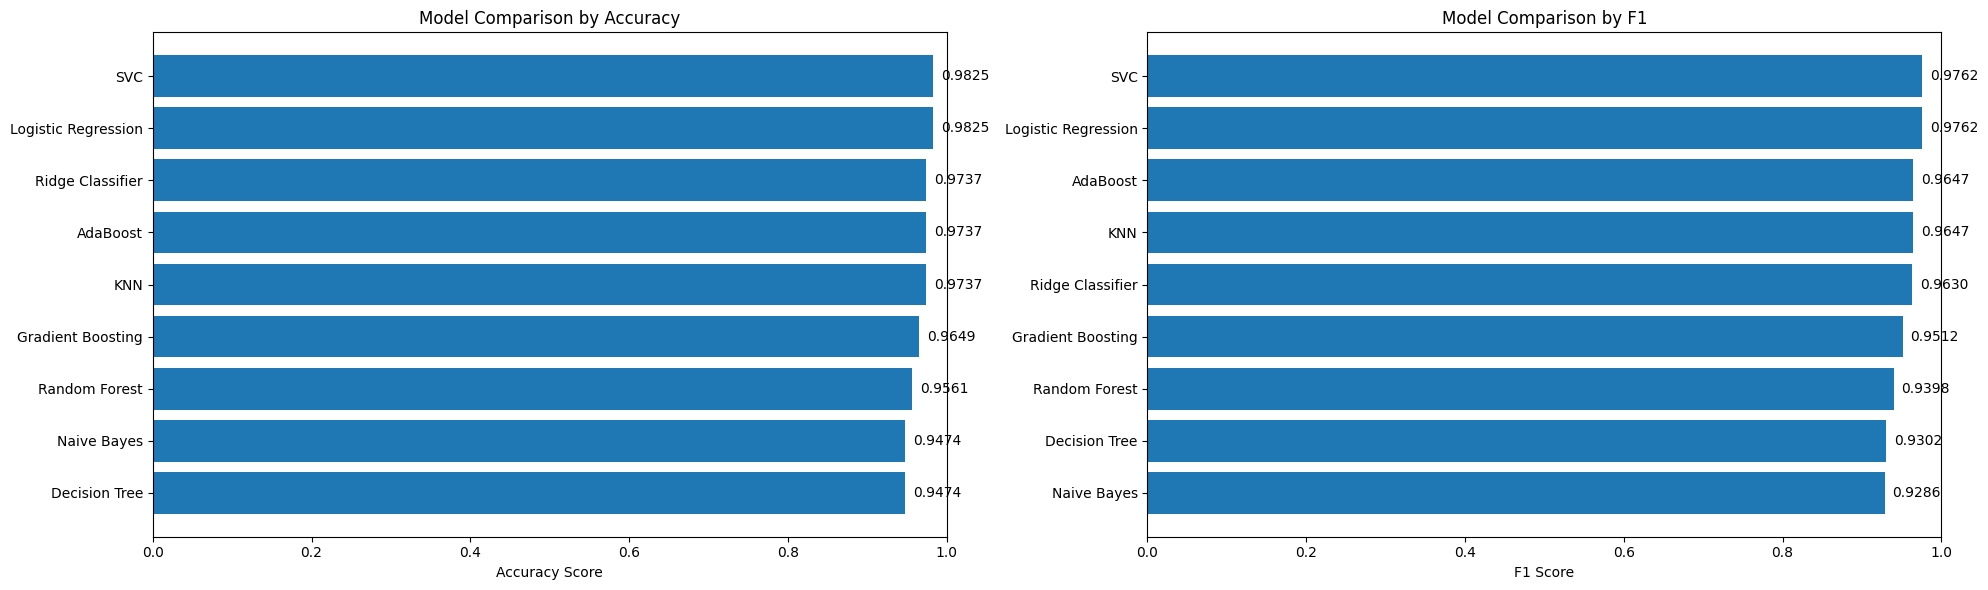

In [332]:
metrics = funs.train_and_evaluate(models, X_train_scaled, y_train, X_test_scaled, y_test)
funs.plot_model_metrics(metrics, ["accuracy", "f1"])

The graphs reveal that the SVC and Logistic Regression models achieve the highest accuracy and F1 scores, both tied at 98.25% and 97.62%, respectively. Looking at the confusion matrices for the two models mentioned, it can be observed that they misclassified one benign sample as malignant and vice versa. This indicates that, while these models show high accuracy and F1 scores overall, there can still be cases where the predictions are incorrect.

To enhance robustness, generalization, and mitigate overfitting, the `evaluate_with_cv` function utilizes cross-validation. Cross-validation helps by splitting the data into multiple subsets (folds) and training the model on different combinations of these subsets. This allows the model to be tested on data it hasn't seen during training, providing a better understanding of how it performs on unseen data. By training and testing the model on multiple subsets, cross-validation offers a more reliable estimate of its true performance, reducing the risk of overfitting to specific data patterns.

The `evaluate_with_cv` function returns a dictionary containing the mean accuracy and F1 scores, along with their standard deviations. The `plot_model_metrics` function is also applied in order to classify the models based on these 4 measurements. It is important to note that a smaller standard deviation is preferred, as it indicates that the model's performance is more consistent across different folds of the cross-validation process.

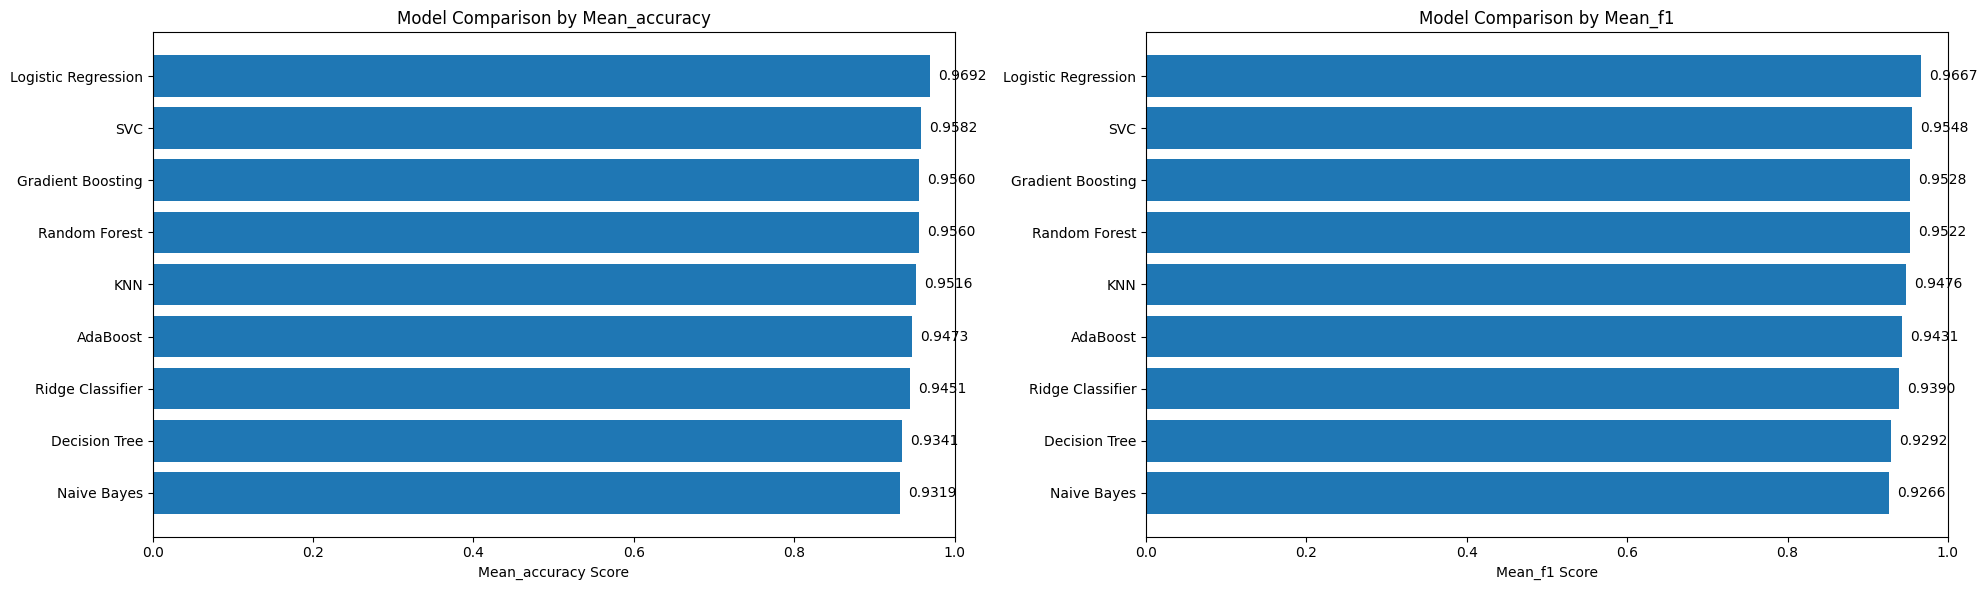

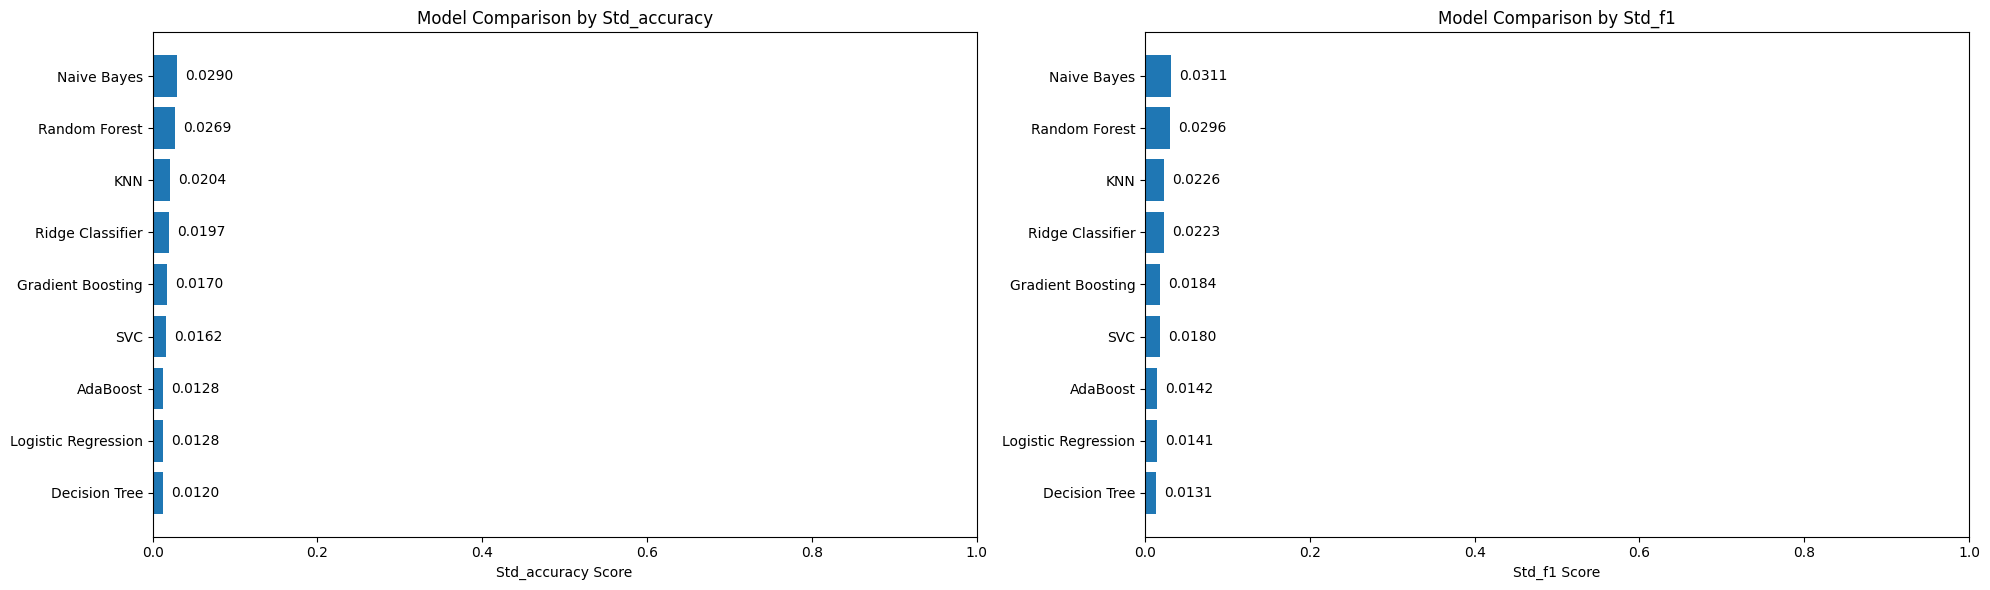

In [333]:
metrics = funs.evaluate_with_cv(models, X_train_scaled, y_train)
funs.plot_model_metrics(metrics, ["mean_accuracy", "mean_f1"])
funs.plot_model_metrics(metrics, ["std_accuracy", "std_f1"])

After using the cross-validation function, there have been some changes in the classification of models ranked by mean accuracy and mean F1. The Logistic Regression model now surpasses the SVC, achieving a mean accuracy of 96.92% and a mean F1 score of 96.67%. Additionally, the standard deviations for both metrics are the second lowest (1.28% and 1.41%, respectively).

### 3.4. Best model selection

Based on the previous results, we select the logistic regression model as the one delivering the highest performance. However, there is still potential for improvement by fine-tuning its hyperparameters. To find the optimal combination of hyperparameters that yields the best results, we will use grid search.

The `param_grid` variable is a dictionary containing a range of candidate values for selected hyperparameters of the logistic regression model. These values are chosen based on the model's characteristics and typical usage. For example, the regularization strength parameter `C` is tested with values of 0.1, 1, 10, and 100, while the `penalty` parameter is varied between "l1", "l2", "elasticnet", and None (for no regularization). This process allows the grid search to evaluate all possible combinations of these parameters to identify the optimal configuration for the best model performance.

In [ ]:
param_grid = {
    "C": [0.1, 1, 10, 100],  
    "penalty": ["l1", "l2", None, "elasticnet"],  
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

log_reg = LogisticRegression(max_iter=500)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation f1: {:.4f}".format(best_score))

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)

print("Test f1: {:.4f}".format(test_accuracy))

Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation f1: 0.9643
Test f1: 0.9912


c:\Users\Javier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
220 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Javier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Javier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Javier\

The optimal model configuration, based on the results from the grid search, uses the following hyperparameters: `C` = 100, `penalty` = "l1", and `solver` = "liblinear". This combination provides the best performance, balancing regularization strength and the solver's ability to converge efficiently with the chosen penalty.

The warning message above appears because certain combinations of hyperparameters, specifically the `penalty` and `solver` values, are not compatible with the logistic regression model’s [implementation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). For example, the "l1" penalty can only be used with solvers like "liblinear" or "saga", while other solvers such as "lbfgs" or "newton-cg" do not support the l1 penalty. 